In [2]:
# Импротируем необходимые функции
import numpy as np # работа с массивами и линейной алгеброй
import matplotlib.pyplot as plt # для отрисовки графиков
import pandas as pd # для чтения и работы с данными
from scipy.optimize import curve_fit # фитирующая процедура

In [43]:
def psi_f(x):
    return np.exp(-x**2/2)/np.sqrt(np.sqrt(np.pi))

def integrate_hist(hist, bin_edges):
    integral = 0
    for i in range(len(hist)):
        integral += hist[i]*(bin_edges[i+1] - bin_edges[i])
    return integral

def distr(df):
    pedestrians, bin_edges = np.histogram(df, bins = 1000)
    #print bin_edges
    
    width = bin_edges[1] - bin_edges[0]
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], pedestrians, width = width)
    plt.xlabel('Ось x'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Распределение пешеходов по оси'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    pedestrians_sq = pedestrians*pedestrians
    norm = integrate_hist(pedestrians_sq, bin_edges)
    psi_sq = pedestrians_sq/norm
    psi = pedestrians/np.sqrt(norm)

    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], psi, width = width)
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi(x)$'.decode('utf-8'))
    plt.title(''.decode('utf-8'))
    ###
    x = np.arange(-4, 4, 0.1)
    plt.plot(x, psi_f(x), color = 'black', label = '$\psi(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], psi_sq, width = width)
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi^2(x)$'.decode('utf-8'))
    plt.title('Плотность вероятности'.decode('utf-8'))
    plt.plot(x, psi_f(x)**2, color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.show()
    
def drawNE(df):
    plt.figure(figsize=(20,7))
    plt.scatter(np.arange(df.shape[0]), df['N'], linewidths=0.1, label = 'Количество пешеходов'.decode('utf-8') )
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Зависимость N от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E'.decode('utf-8'))
    plt.title('Зависимость энергии от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E_r'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E_r'.decode('utf-8'))
    plt.title('Зависимость опорного потенциала от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()
    
E_ds = pd.DataFrame(columns=['ds', 'E'])

In [ ]:
def analyse(frame, frameNE, ds, E_ds, begin = 500):
    distr(frame)
    drawNE(frameNE)
    E = frameNE[begin:]['E'].mean()
    s_E = np.std(frameNE[begin:]['E'])/np.sqrt(frameNE[begin:].shape[0])
    E_r = frameNE[begin:]['E_r'].mean()
    s_E_r = np.std(frameNE[begin:]['E_r'])/np.sqrt(frameNE[begin:].shape[0])
    print E, s_E
    print E_r, s_E_r
    s = pd.Series([ds,E],index=['ds','E'])
    E_ds = E_ds.append(s,ignore_index=True)
    return E_ds

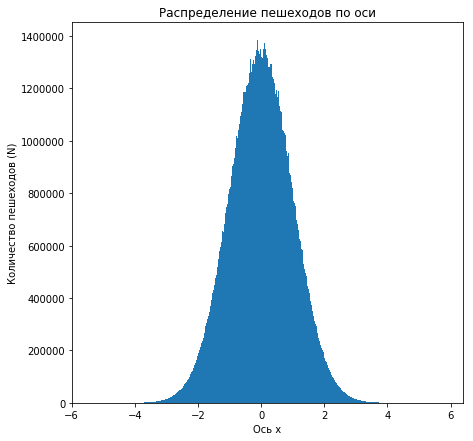

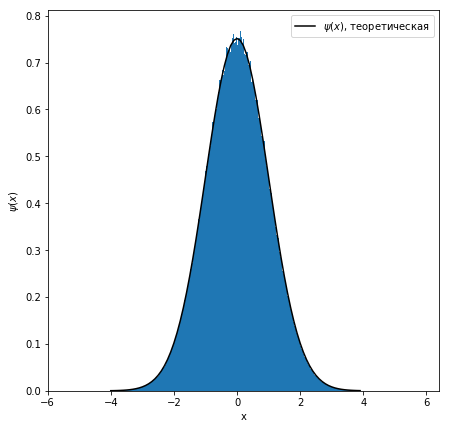

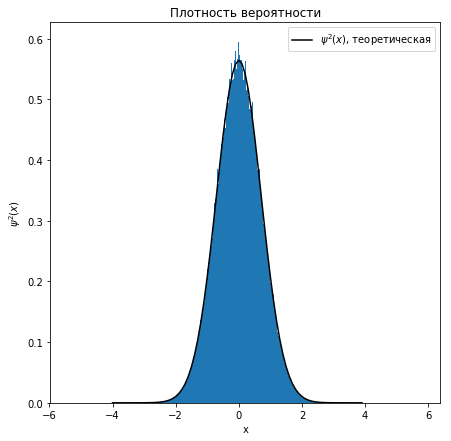

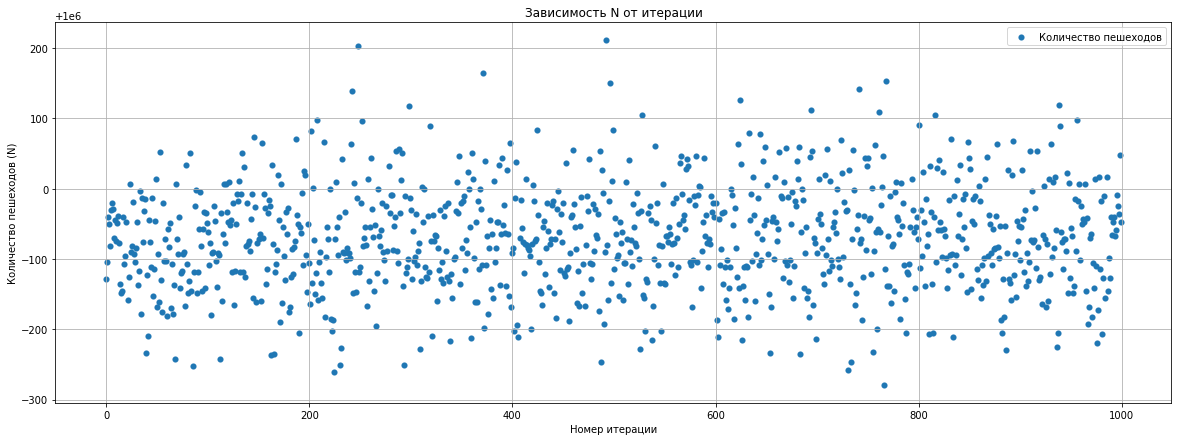

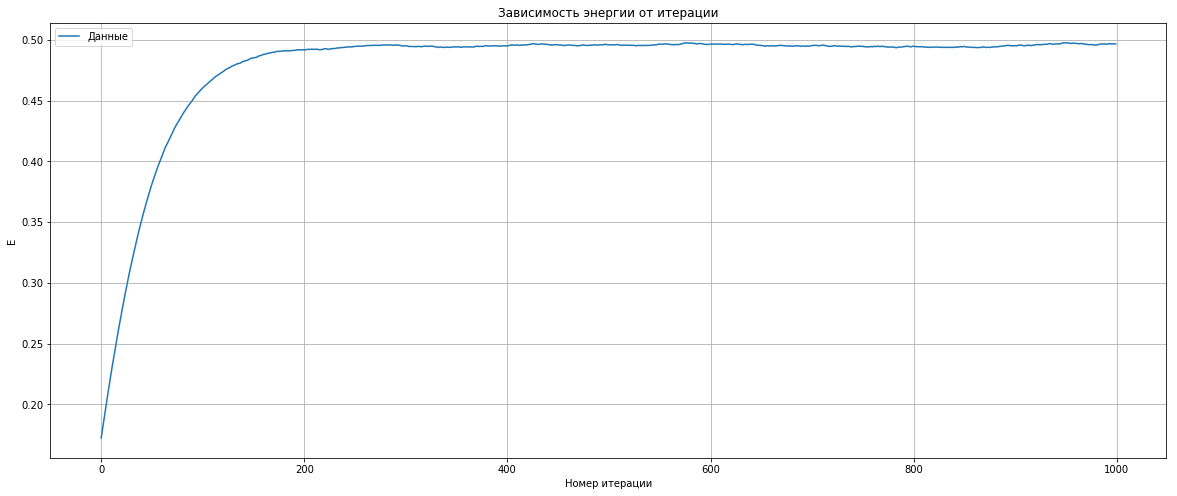

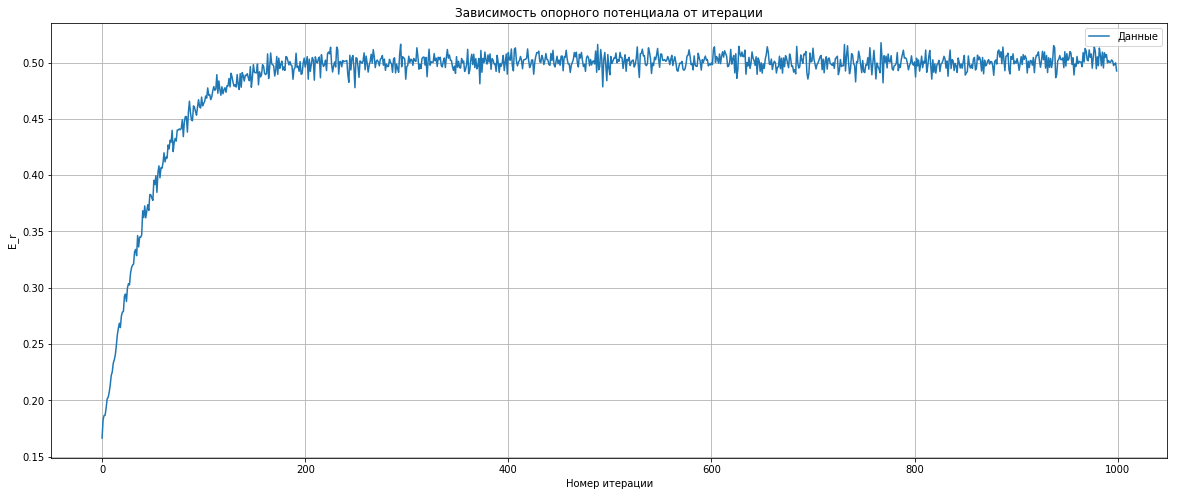

0.495383074 4.61381833306e-05
0.500871786 0.000277473401522


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.11/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.11/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.11, E_ds = E_ds)
del frame
del frameNE

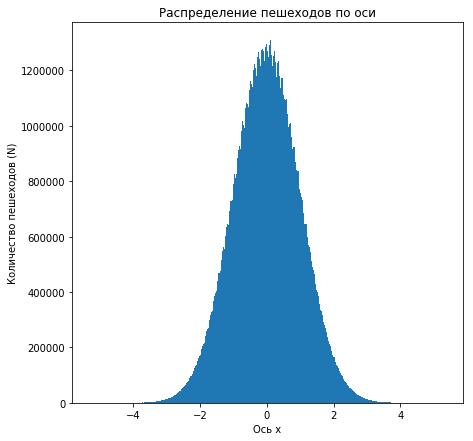

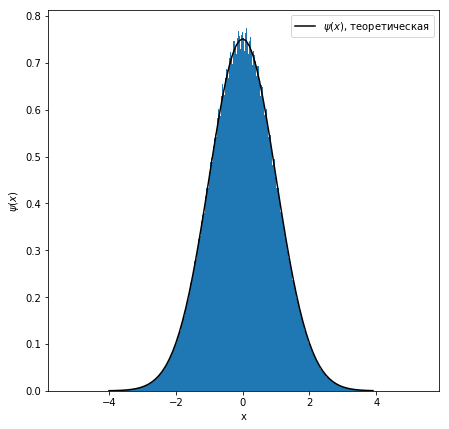

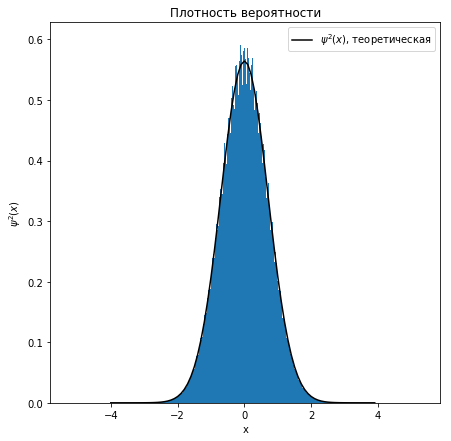

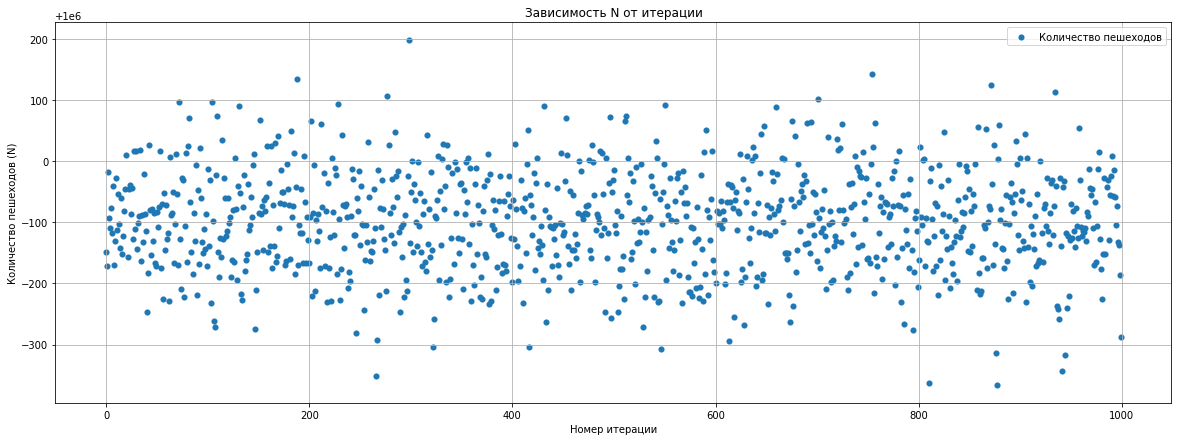

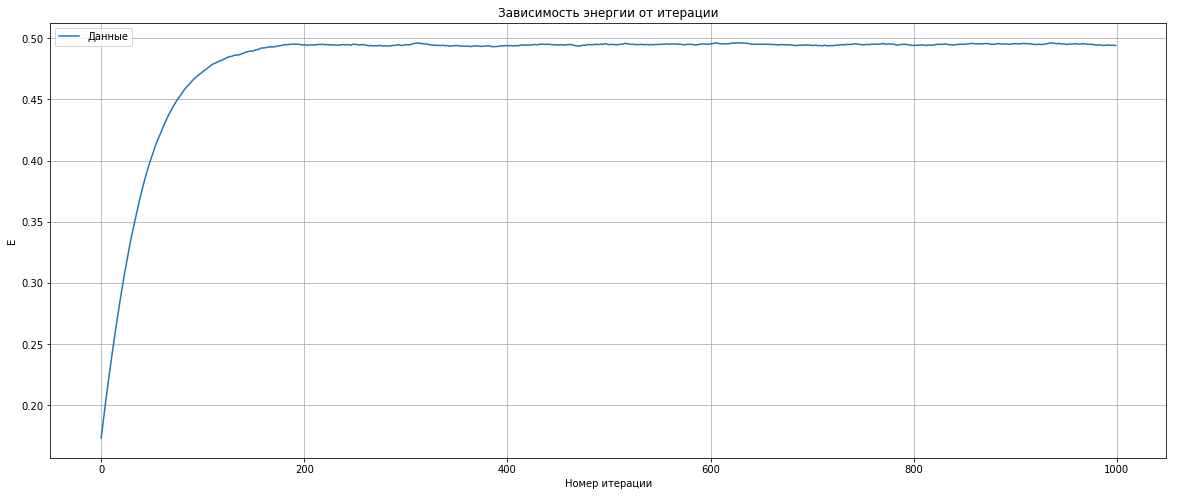

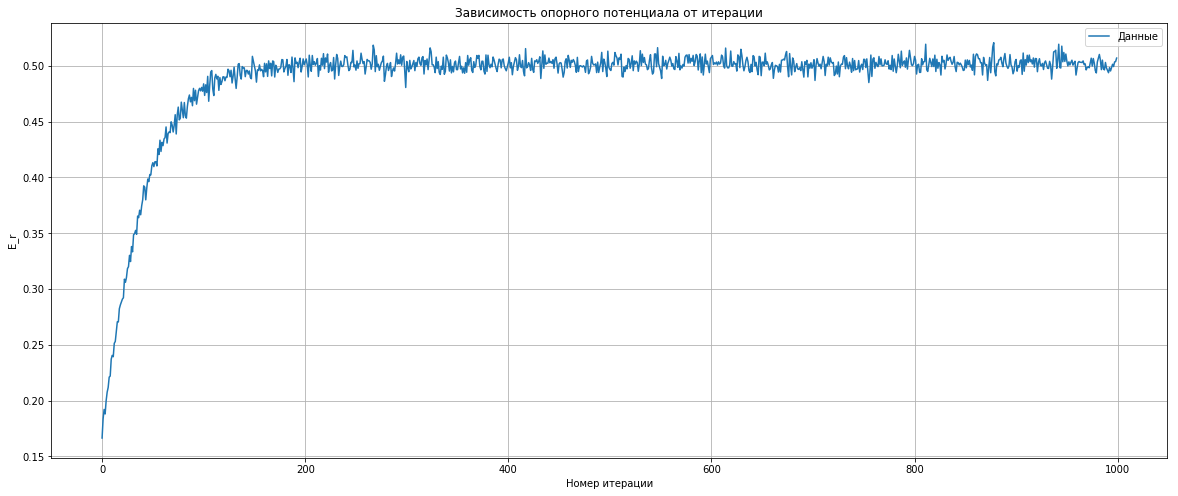

0.495062006 2.30052662651e-05
0.501981934 0.000251843564816


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.12/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.12/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.12, E_ds = E_ds)
del frame
del frameNE

In [ ]:
E_ds

ds         E
0  0.11  0.495383
1  0.12  0.495062

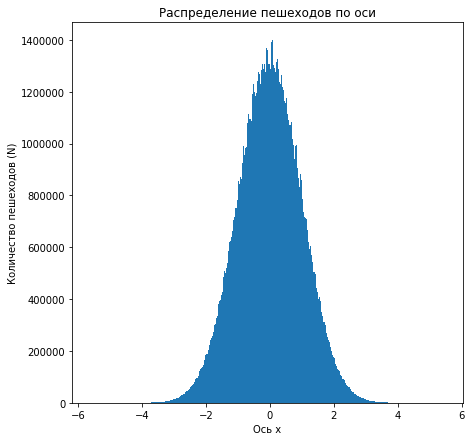

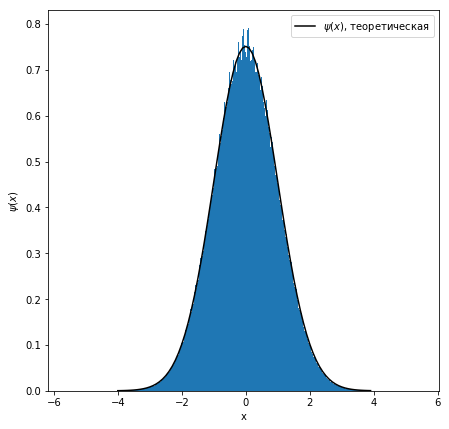

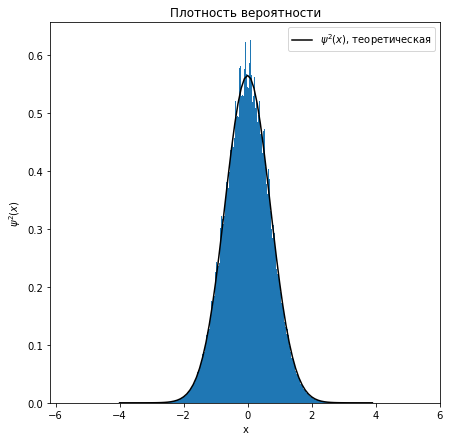

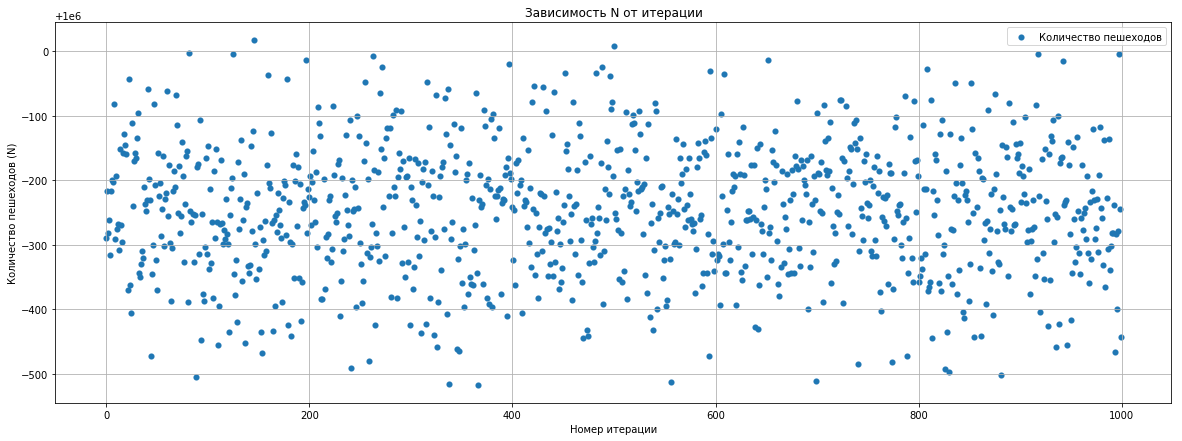

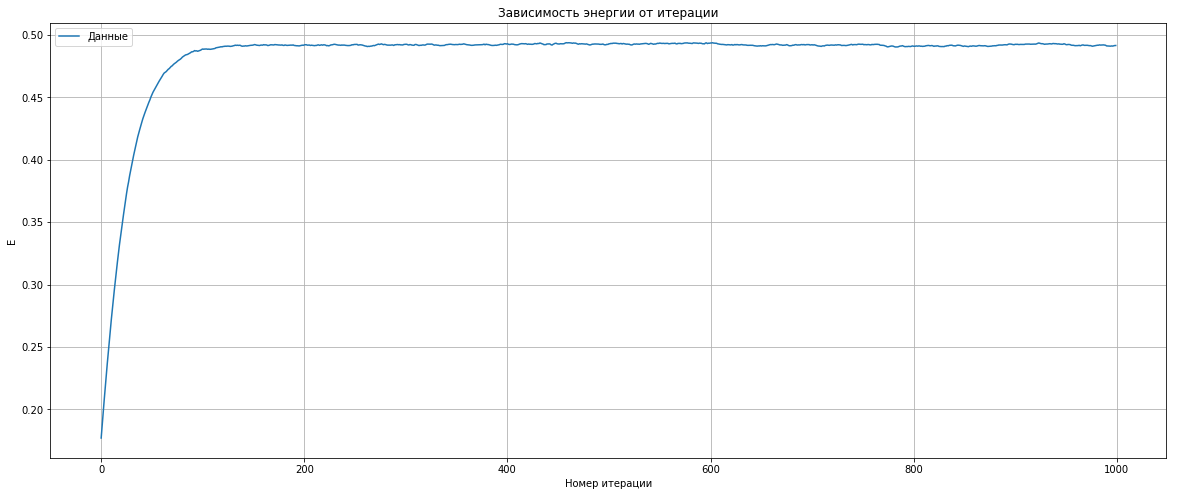

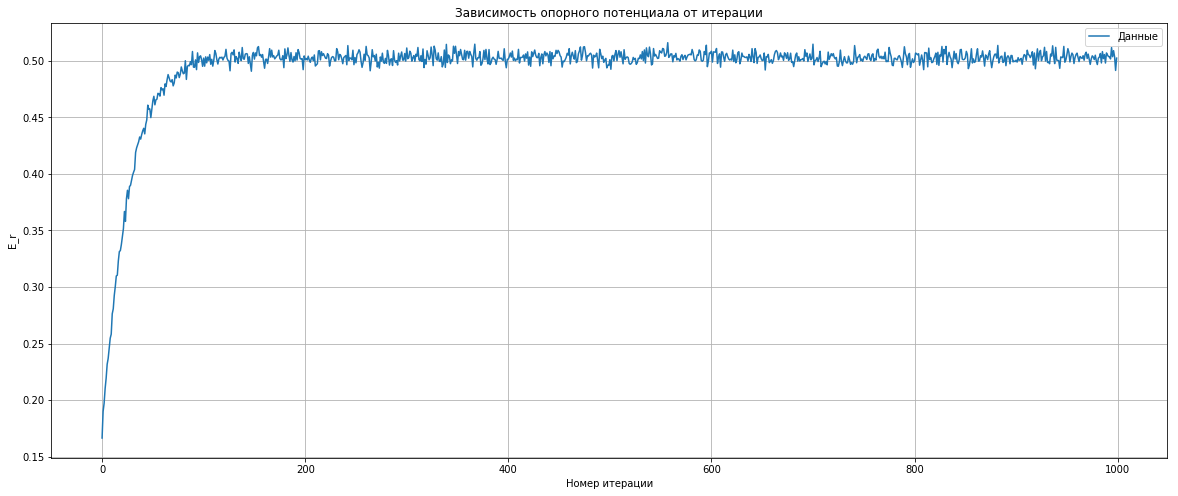

0.492044908 3.57702241406e-05
0.502984848 0.000191987294918


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.15/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.15/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.15, E_ds = E_ds)
del frame
del frameNE

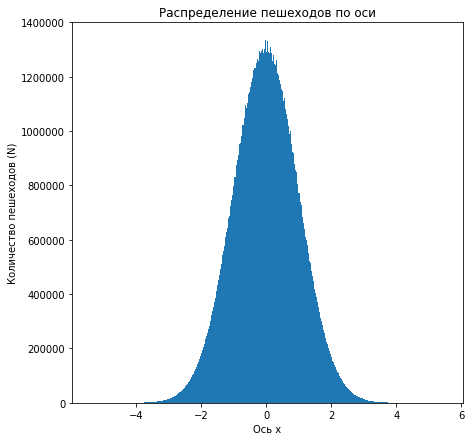

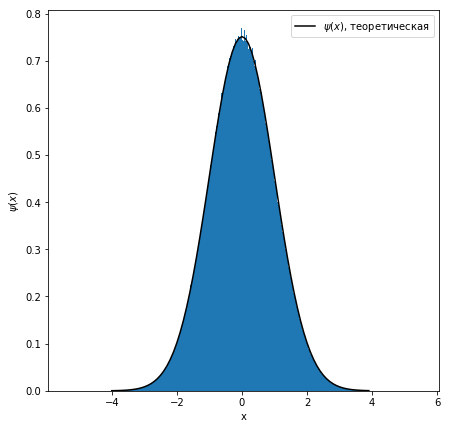

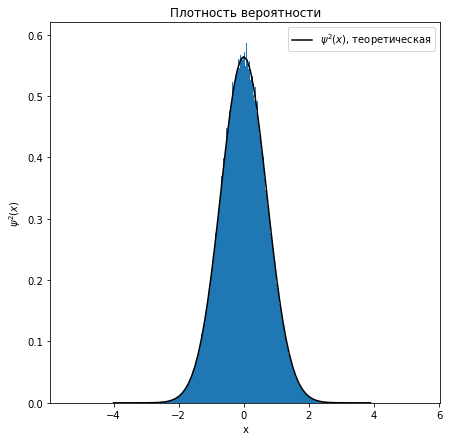

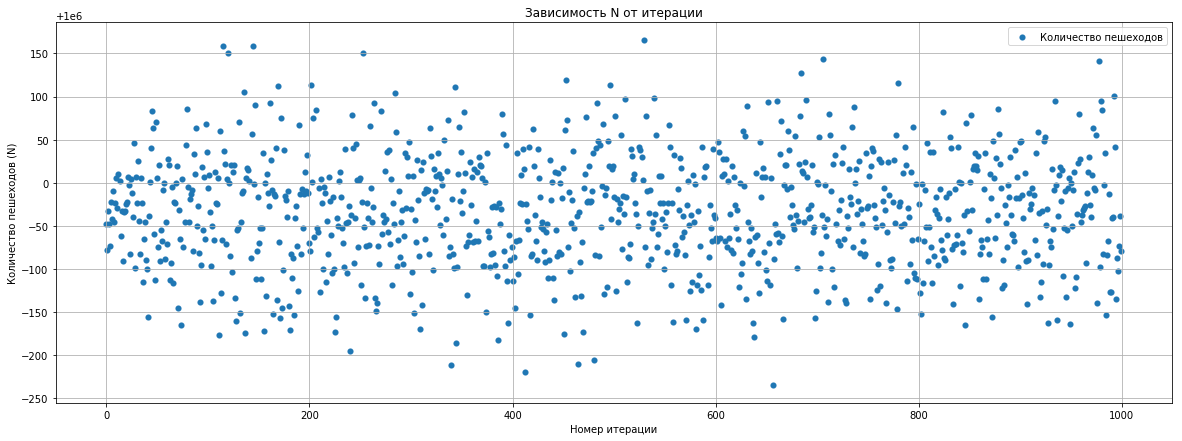

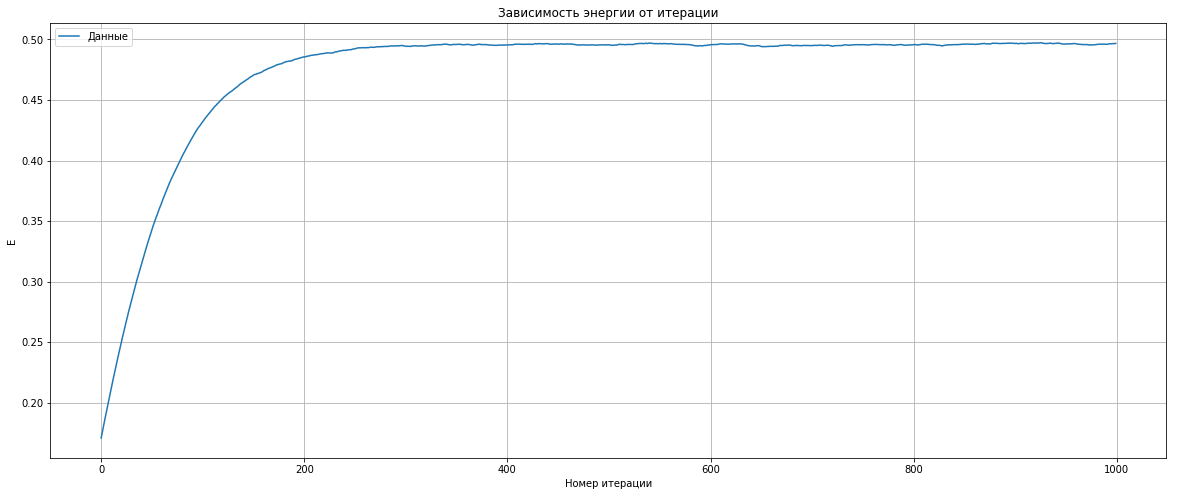

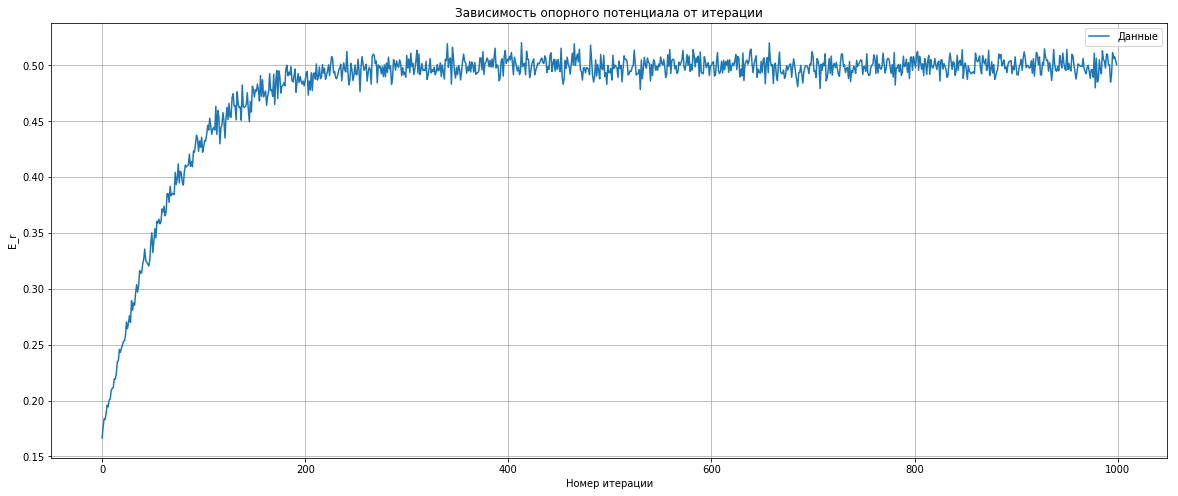

0.495843906 3.17241787022e-05
0.499505012 0.000310959743928


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.095/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.095/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.095, E_ds = E_ds)
del frame
del frameNE

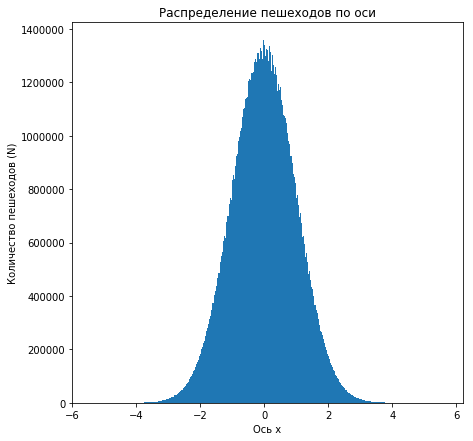

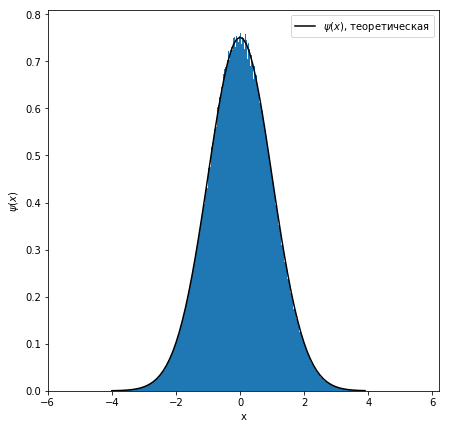

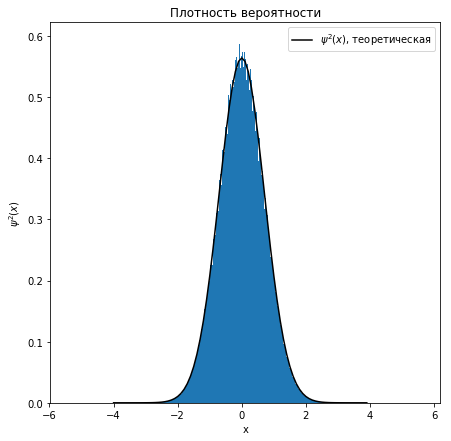

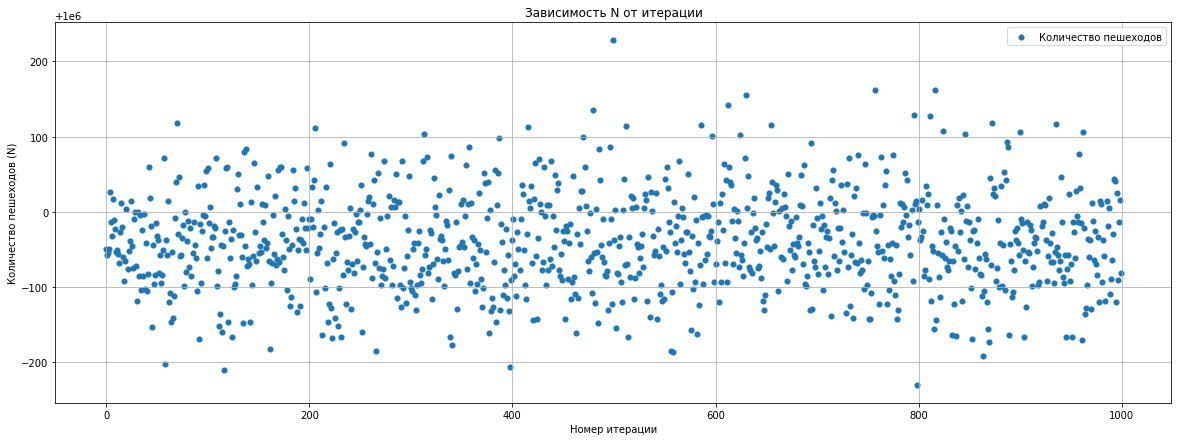

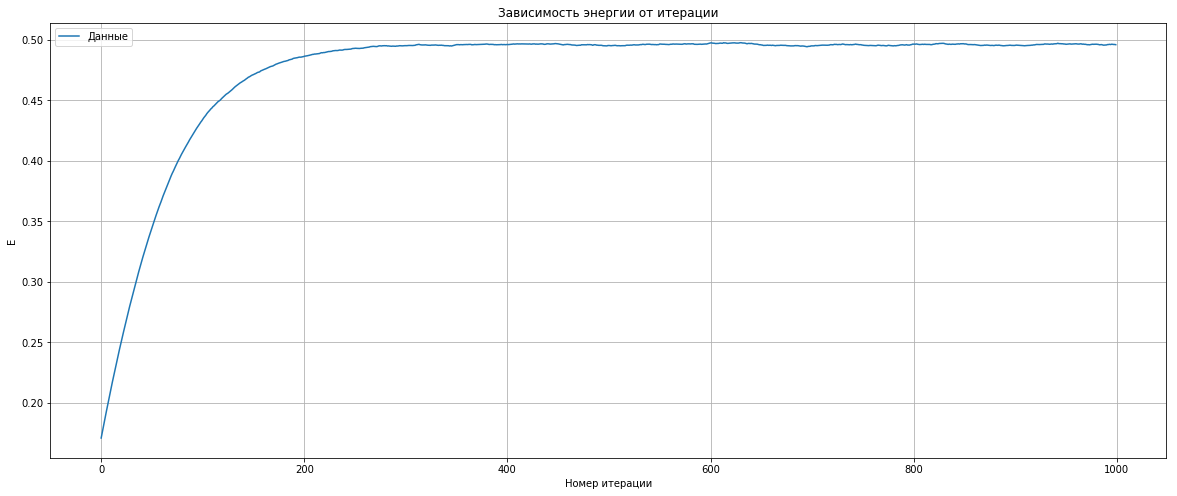

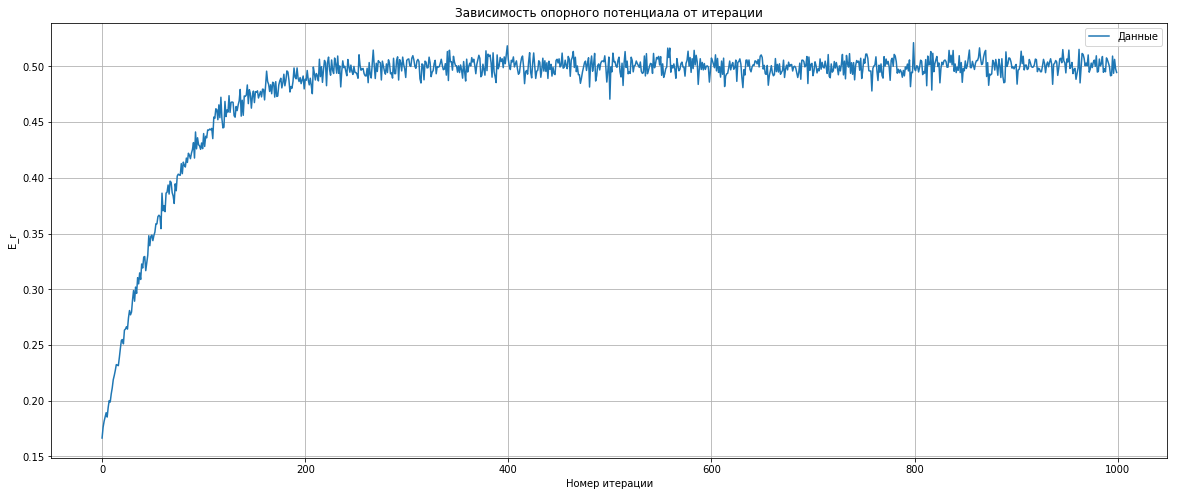

0.49616667 2.95552506706e-05
0.50017879 0.000311246394401


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.096/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.096/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.096, E_ds = E_ds)
del frame
del frameNE

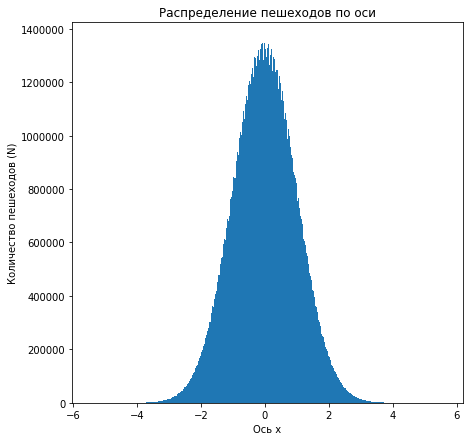

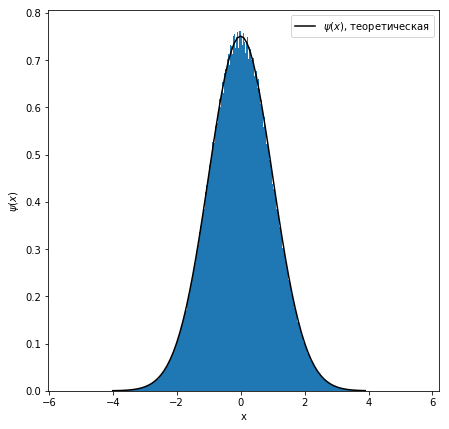

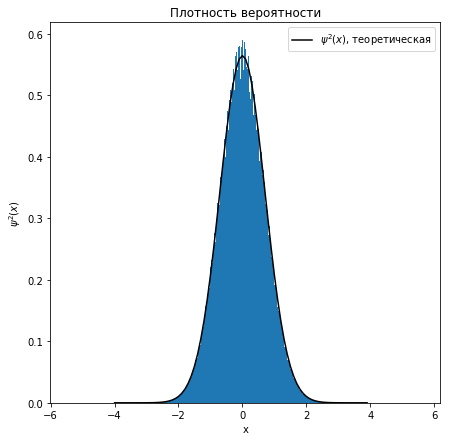

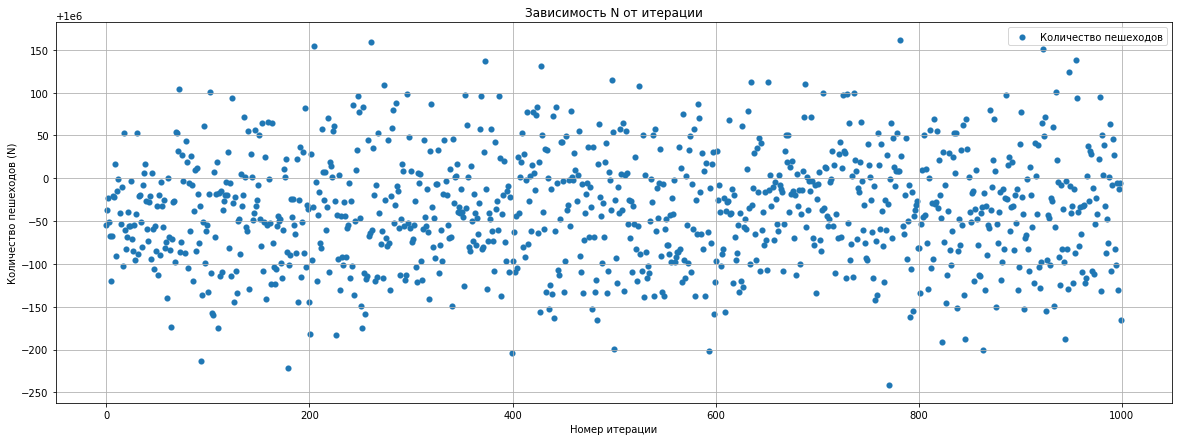

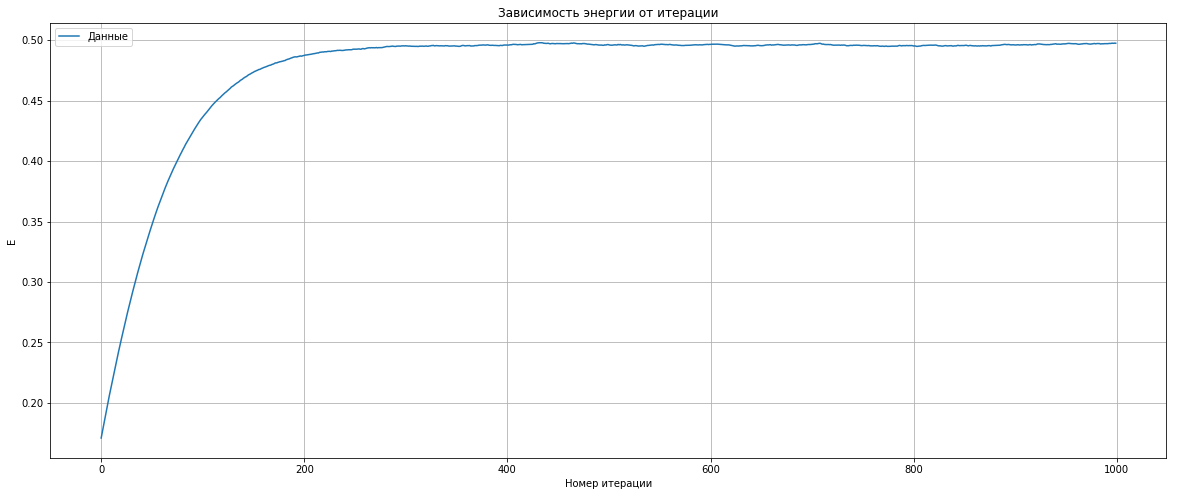

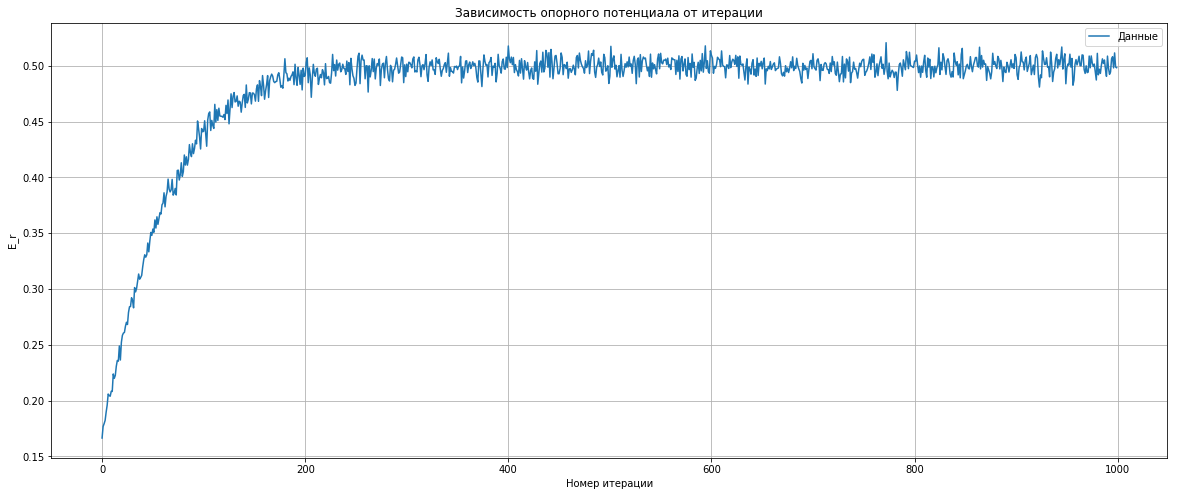

0.496018188 2.73999552064e-05
0.499670628 0.000308254392571


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.097/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.097/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.097, E_ds = E_ds)
del frame
del frameNE

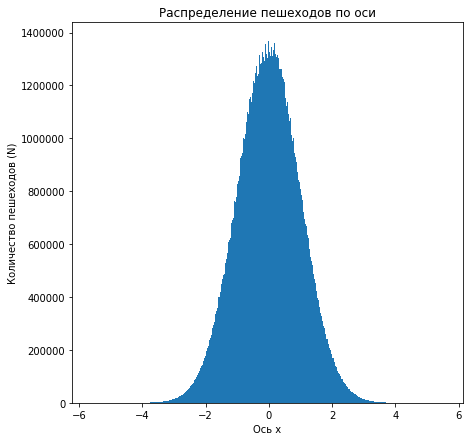

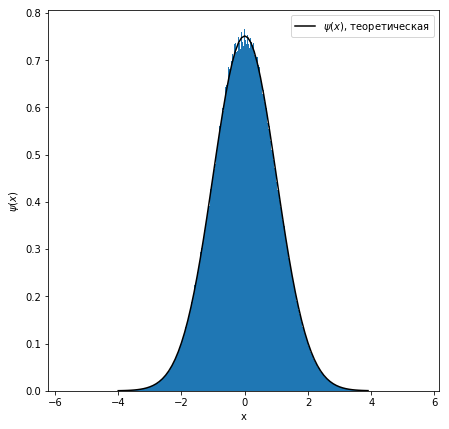

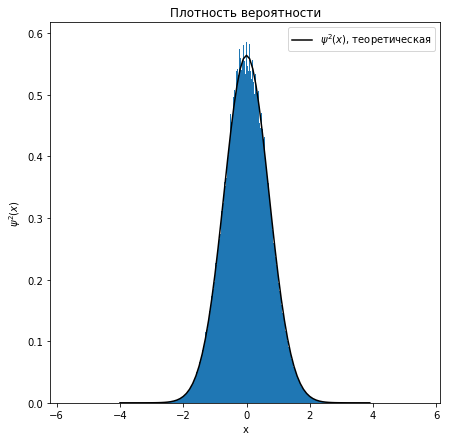

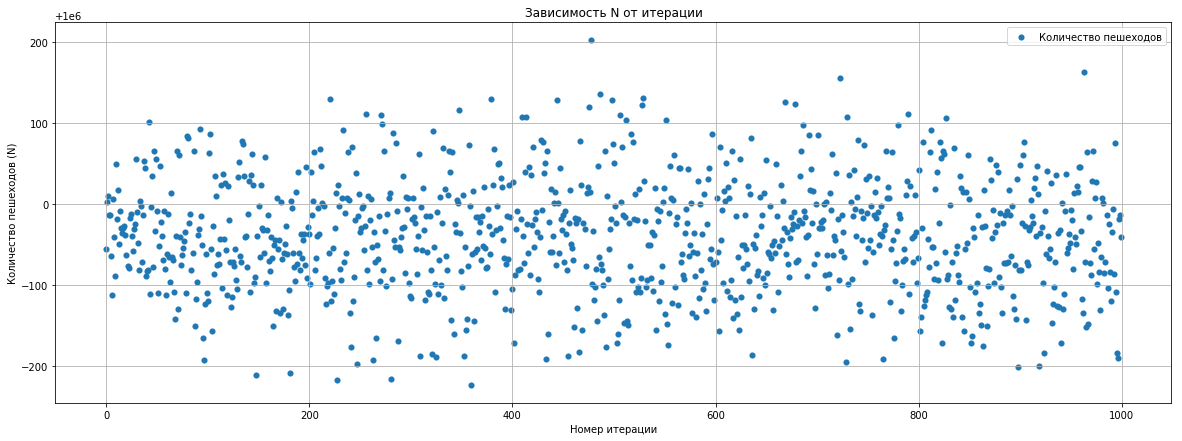

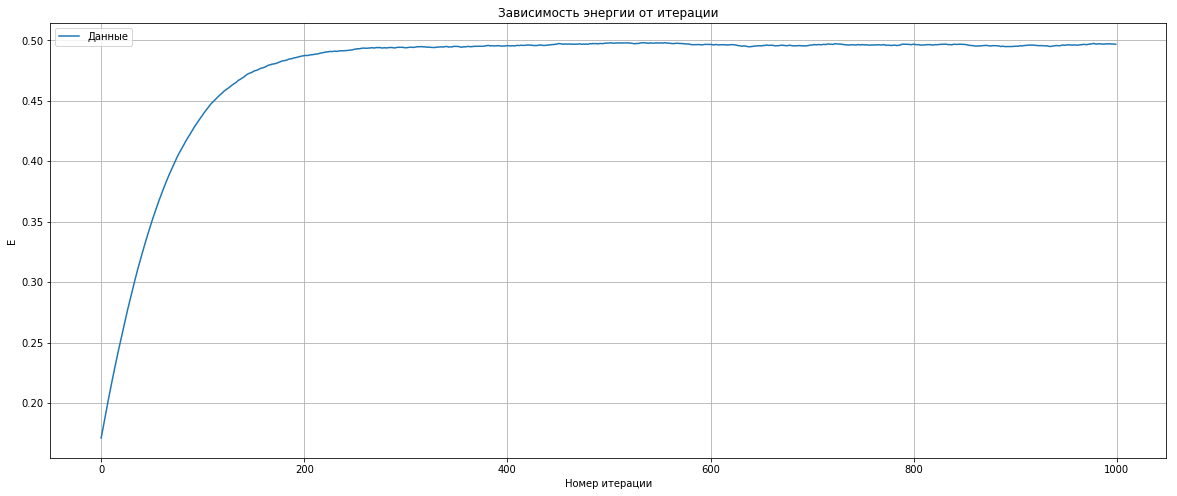

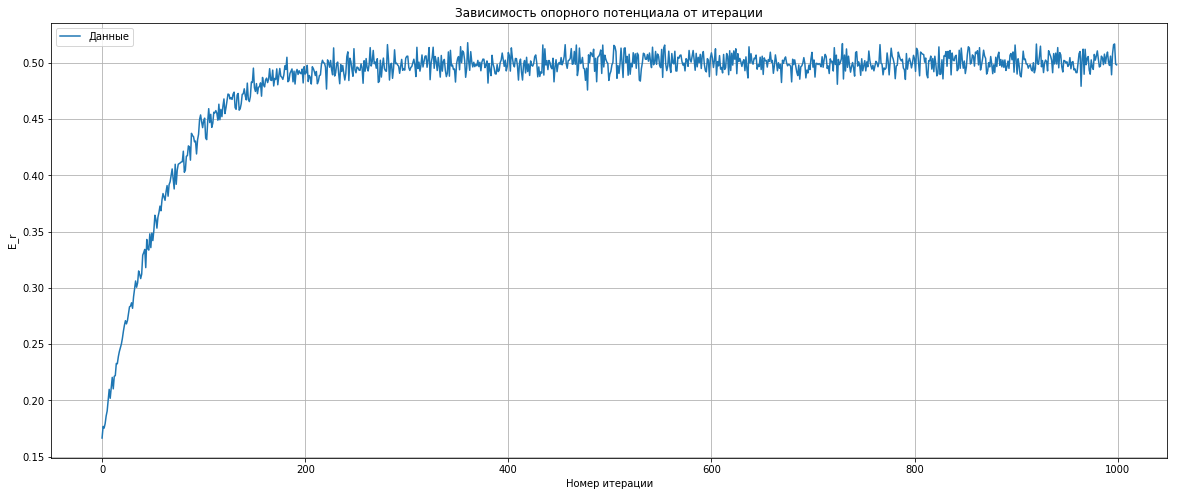

0.496273366 3.51456105949e-05
0.500470488 0.000321138522092


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.098/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.098/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.098, E_ds = E_ds)
del frame
del frameNE

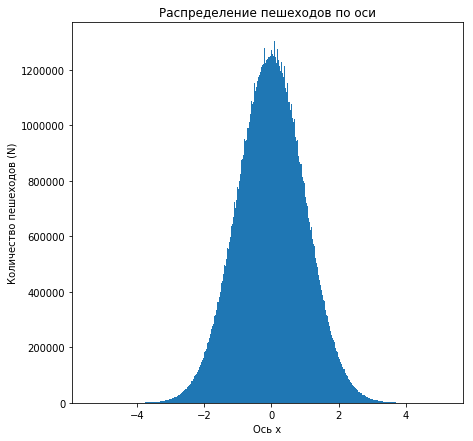

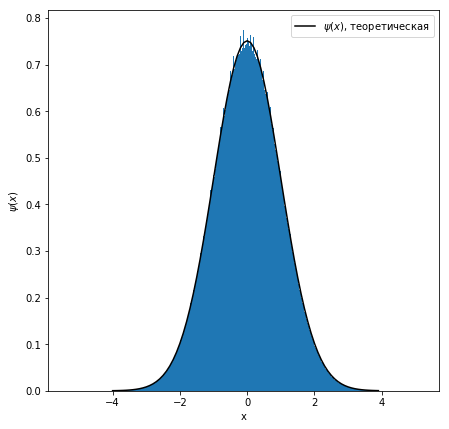

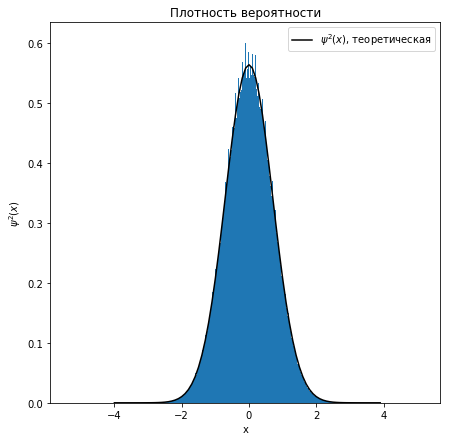

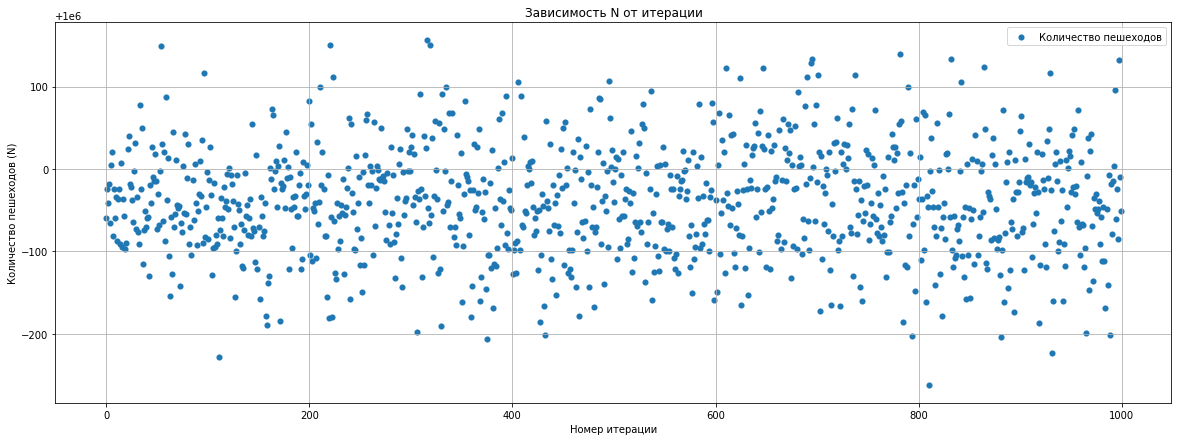

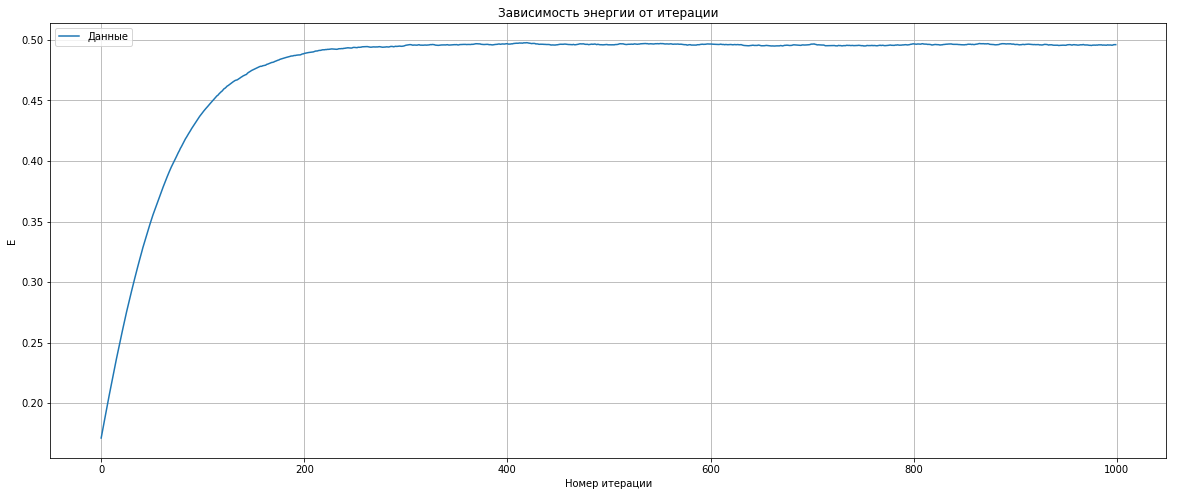

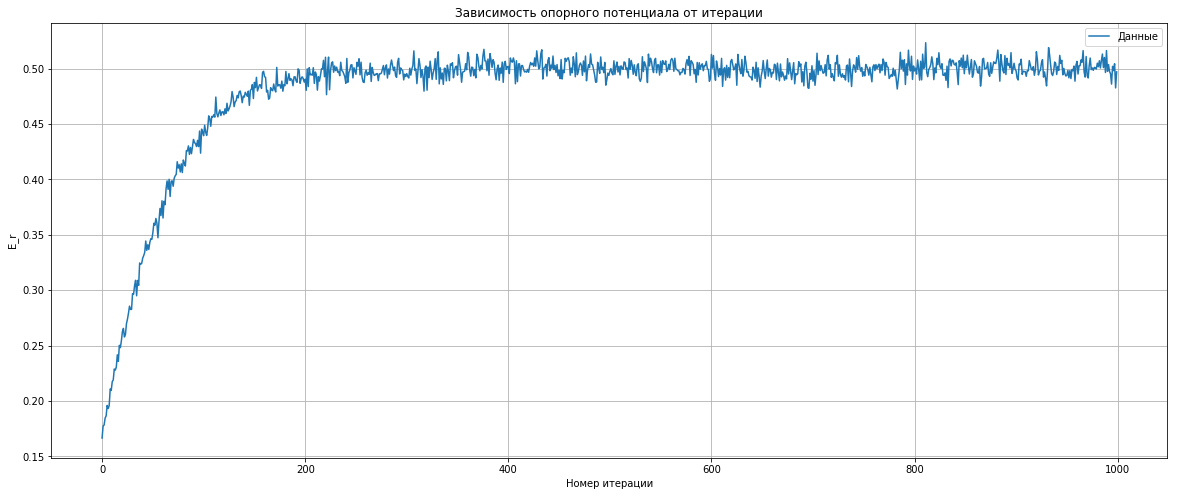

0.496013276 2.27433007202e-05
0.499874848 0.000311800388739


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.099/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.099/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.099, E_ds = E_ds)
del frame
del frameNE

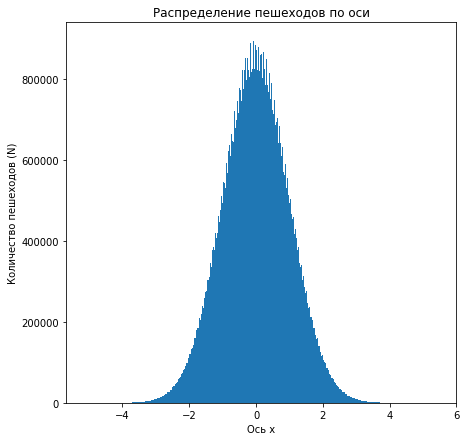

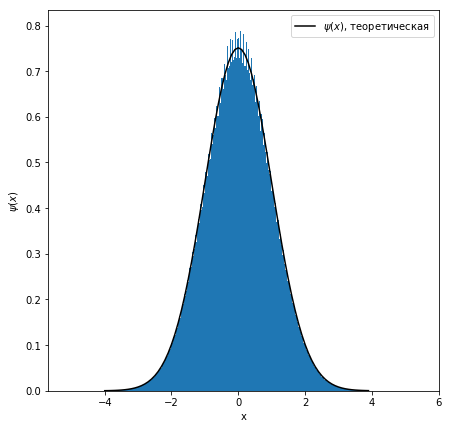

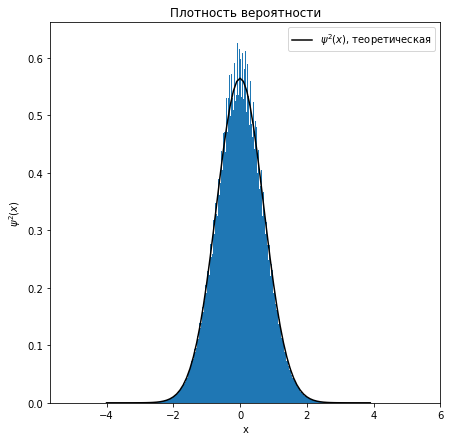

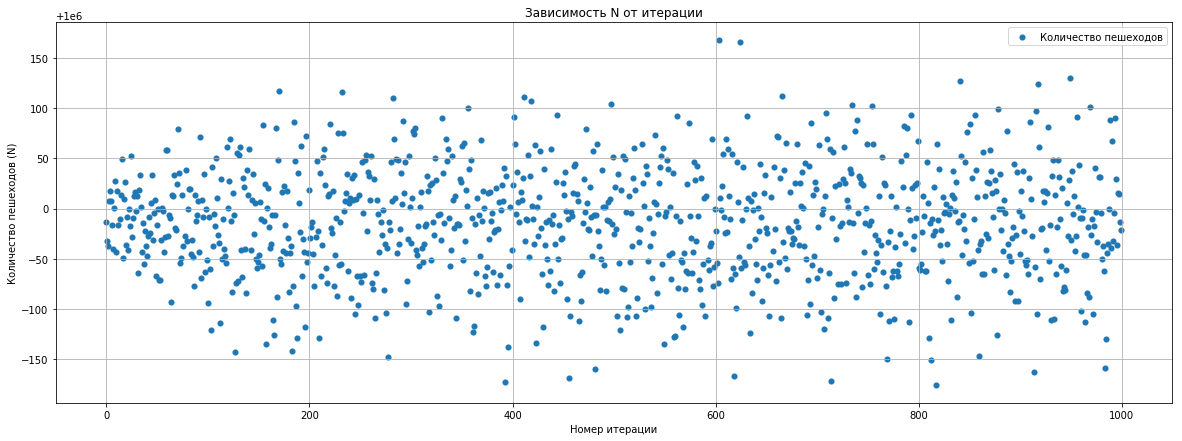

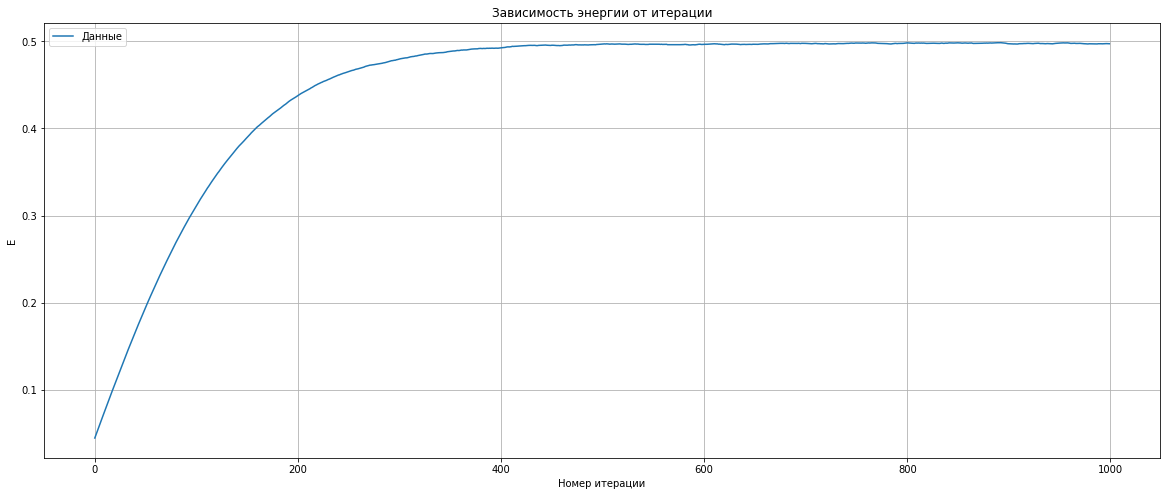

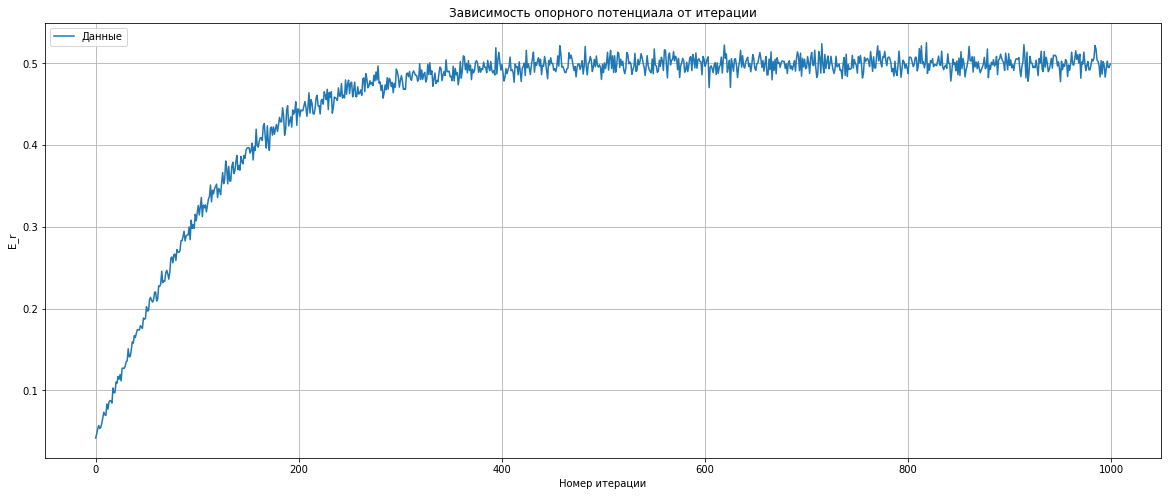

0.497641675 2.61326777594e-05
0.499825855 0.000625934763909


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.08/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.08/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.08, E_ds = E_ds, begin = 800)
del frame
del frameNE

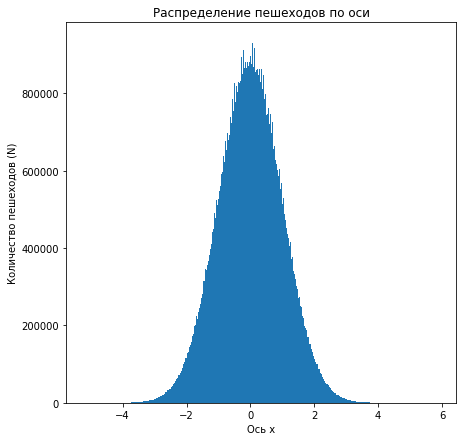

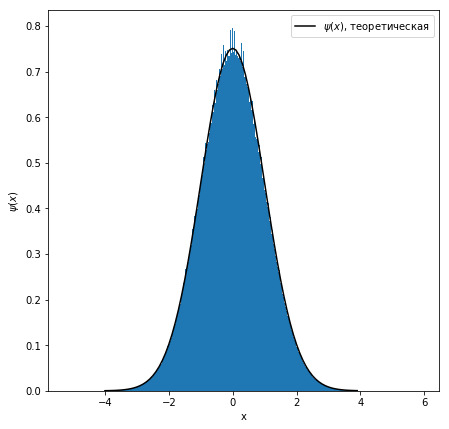

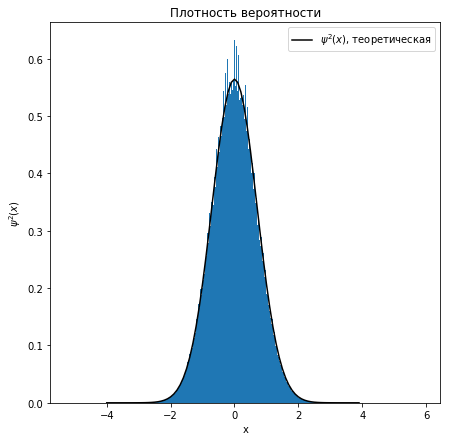

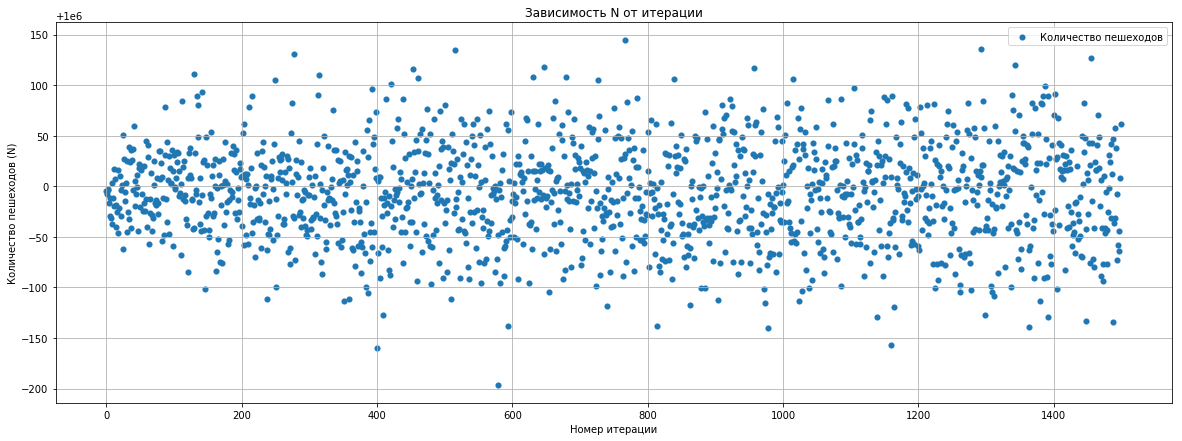

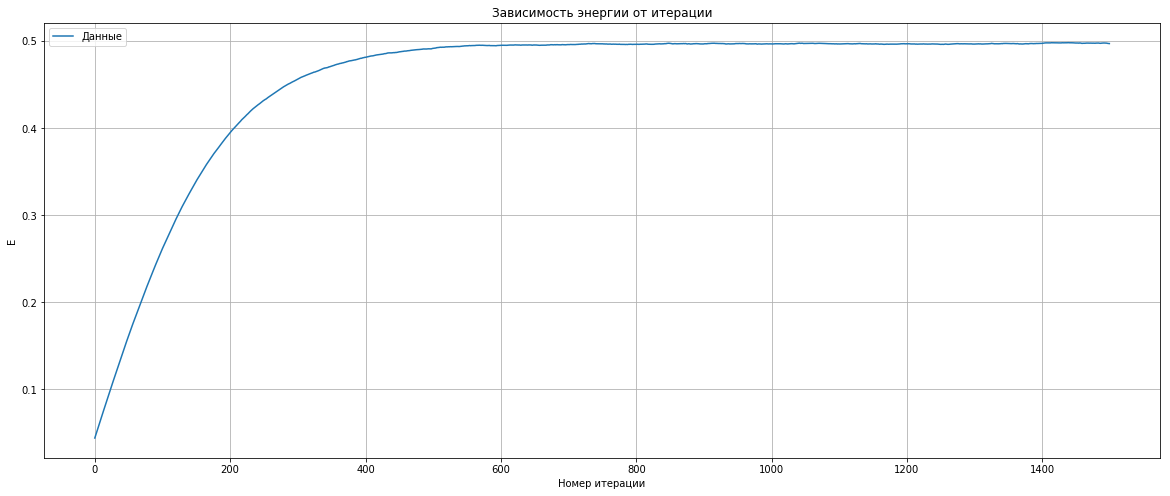

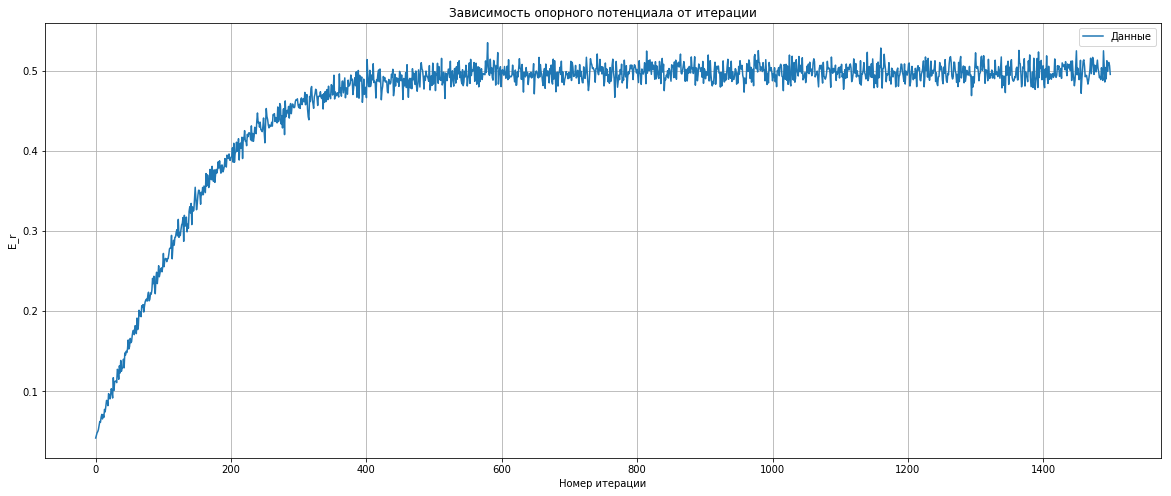

0.497182122 2.05621986721e-05
0.49849758 0.000461492505594


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.07/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.07/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.07, E_ds = E_ds, begin = 1000)
del frame
del frameNE

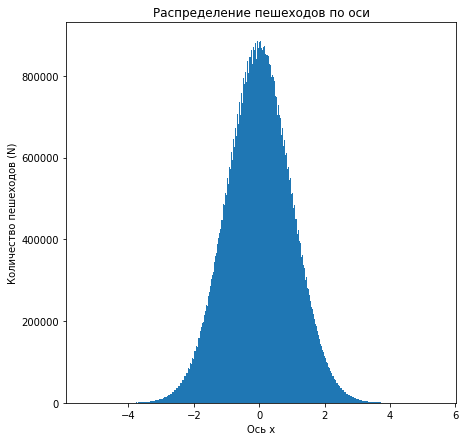

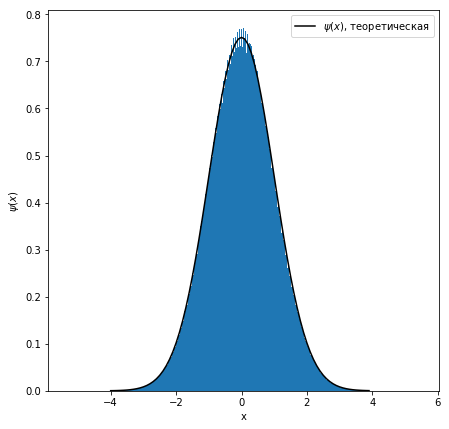

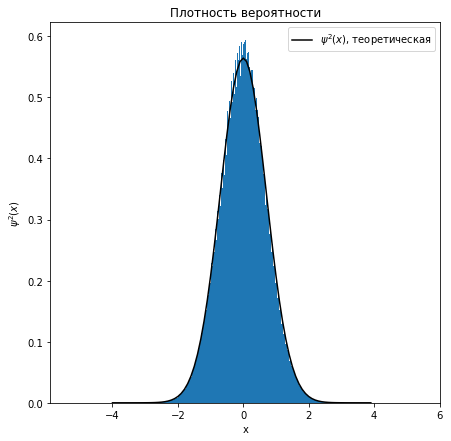

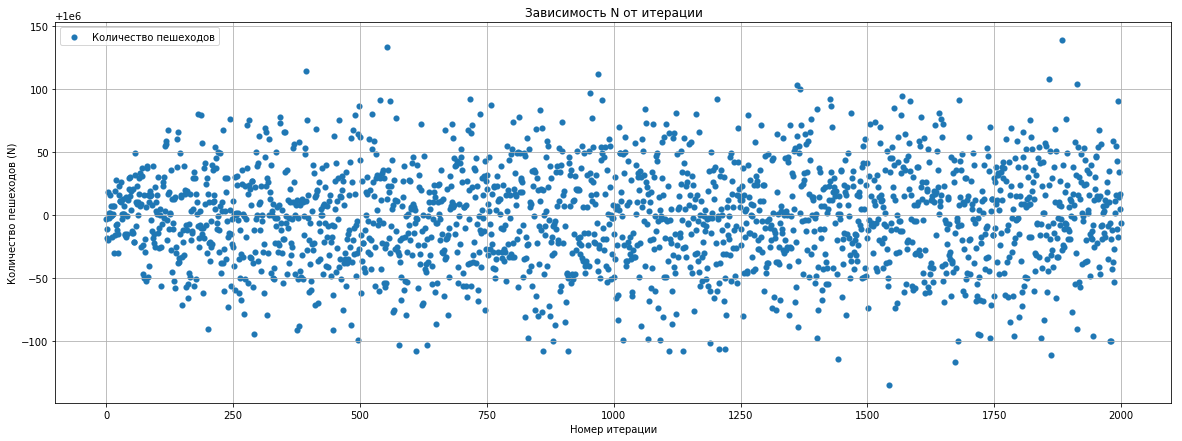

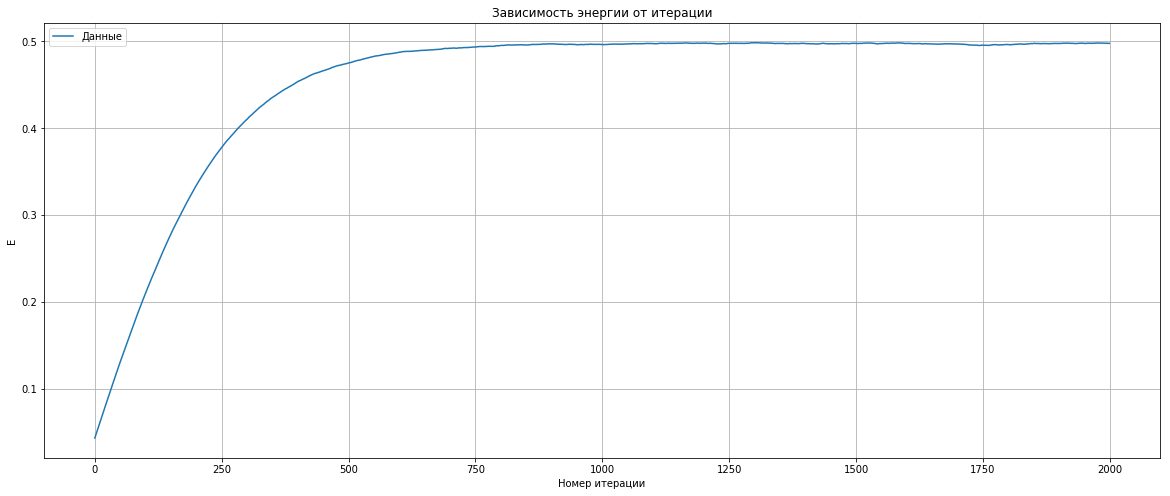

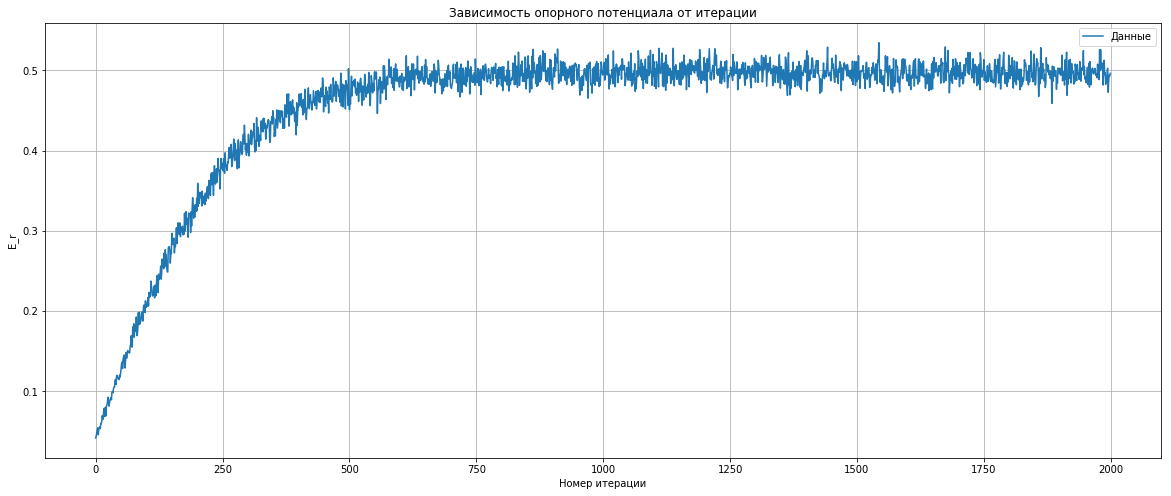

0.49723906 3.32053792148e-05
0.49722688 0.000508842110988


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.06/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1000)_ds=0.06/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.06, E_ds = E_ds, begin = 1500)
del frame
del frameNE

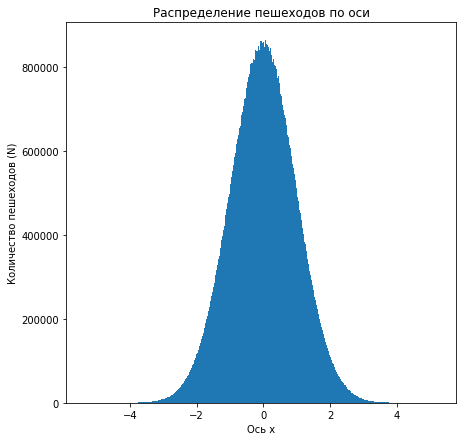

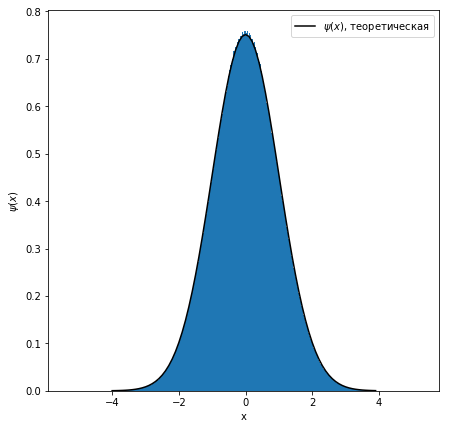

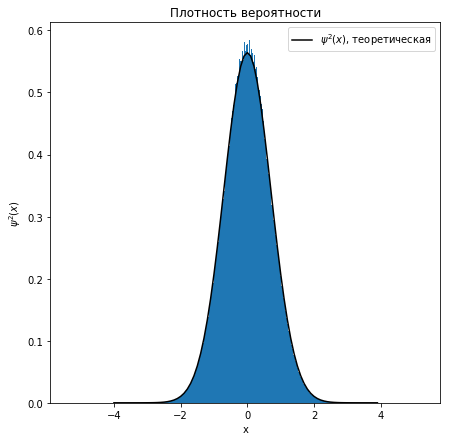

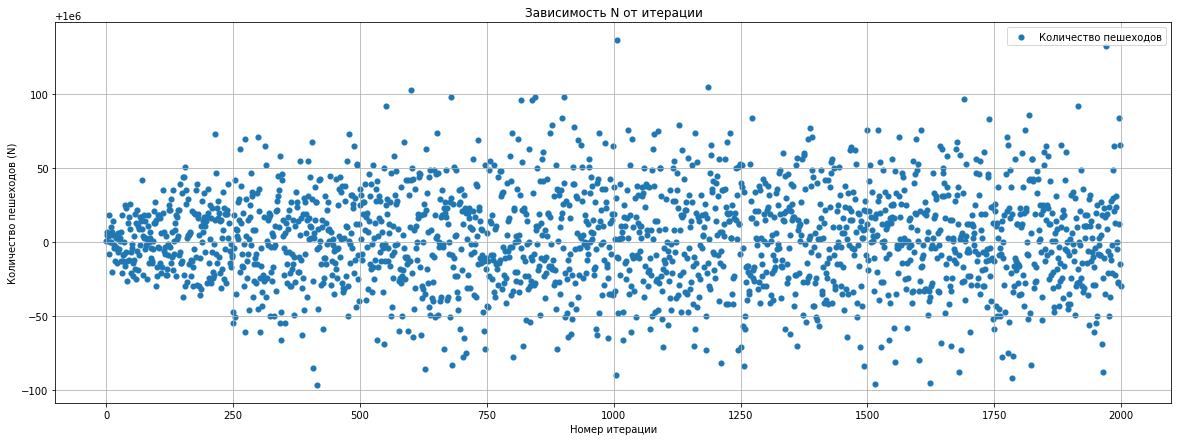

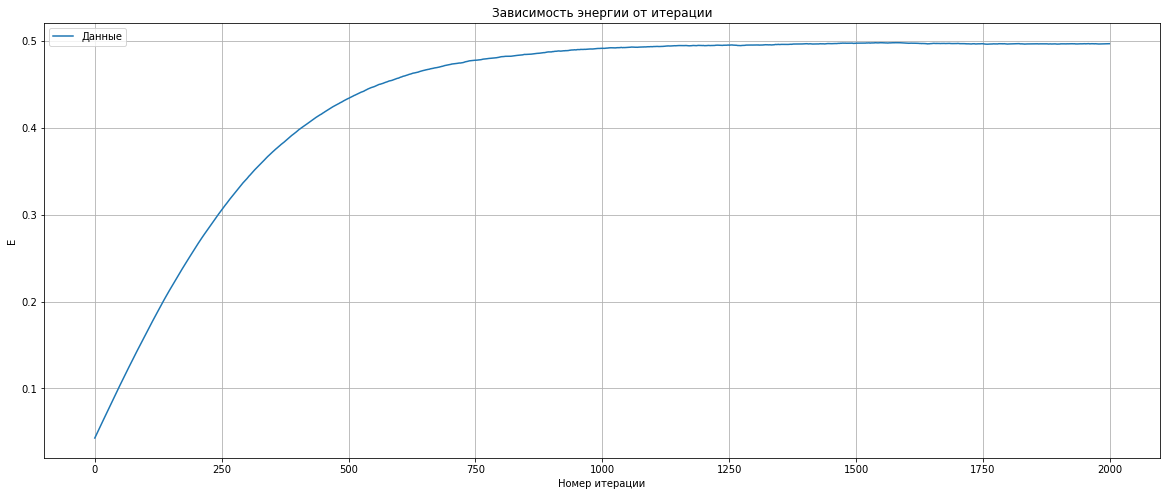

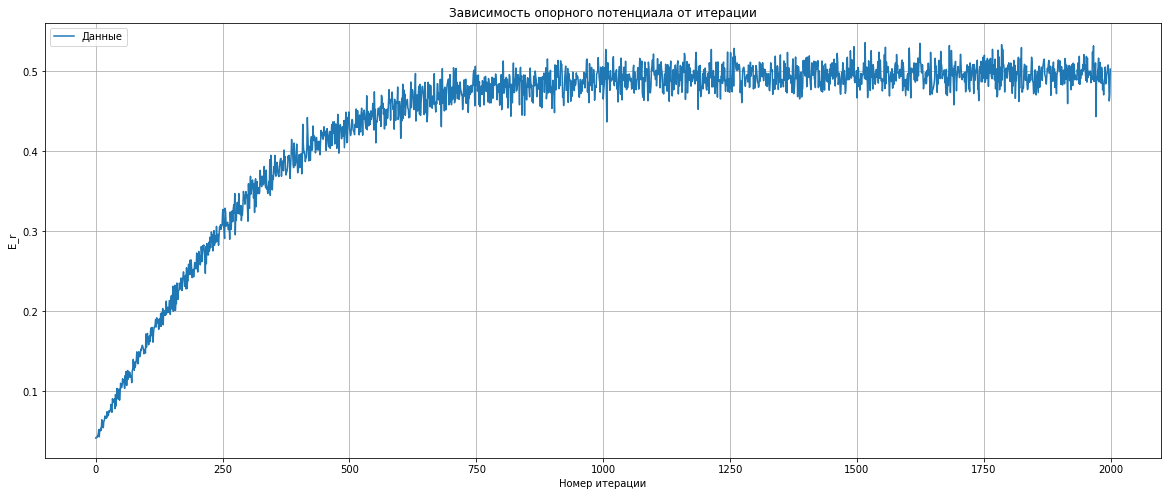

0.496872982 2.01907748081e-05
0.496243498 0.000618111813623


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x2000)_ds=0.05/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x2000)_ds=0.05/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.05, E_ds = E_ds, begin = 1500)
del frame
del frameNE

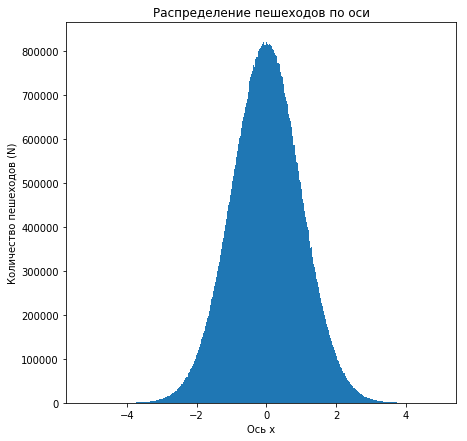

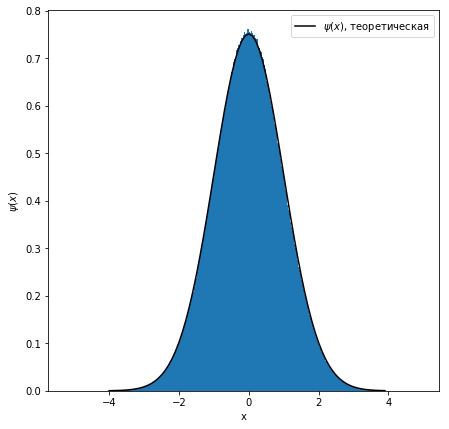

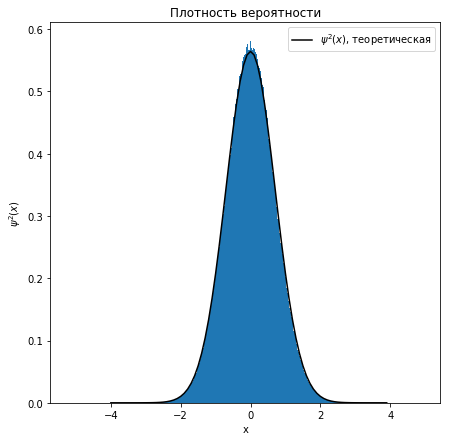

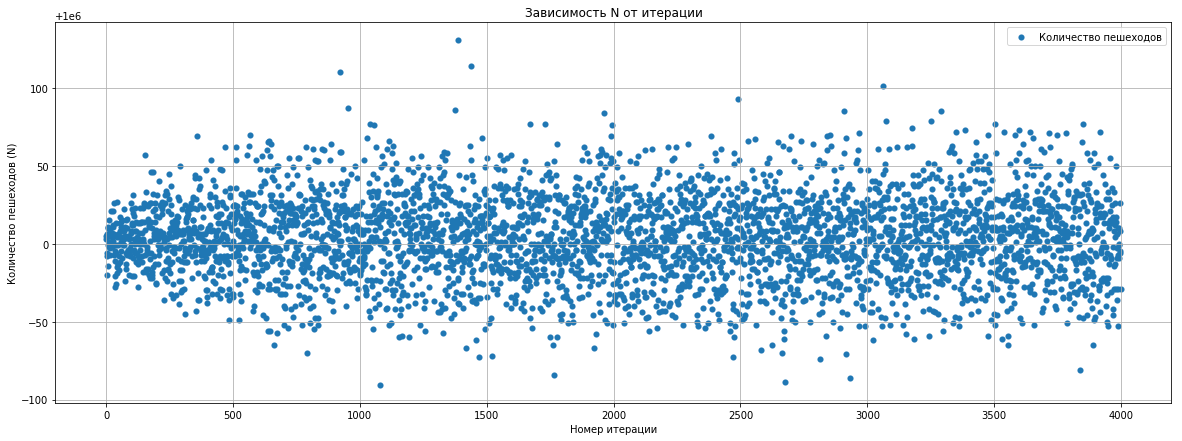

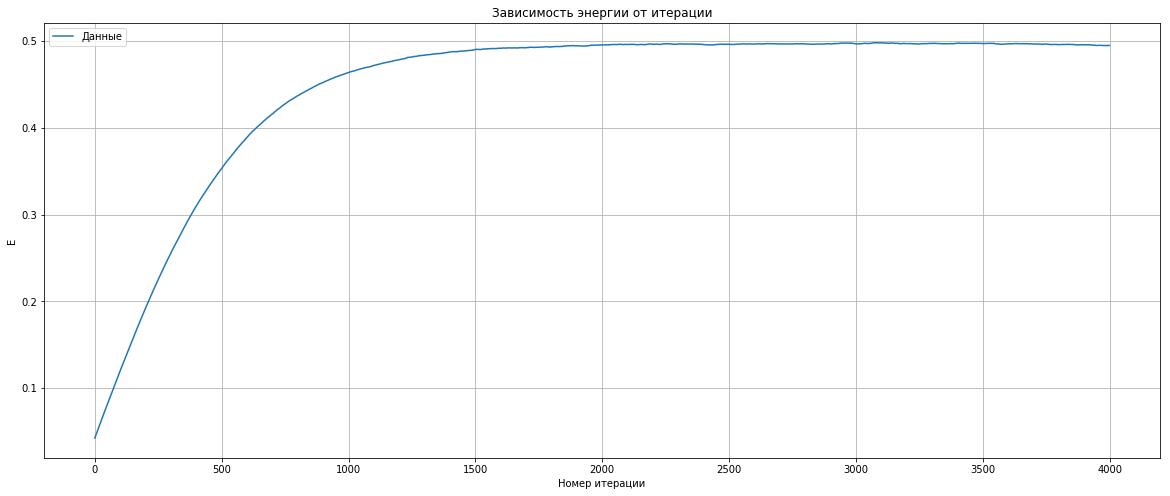

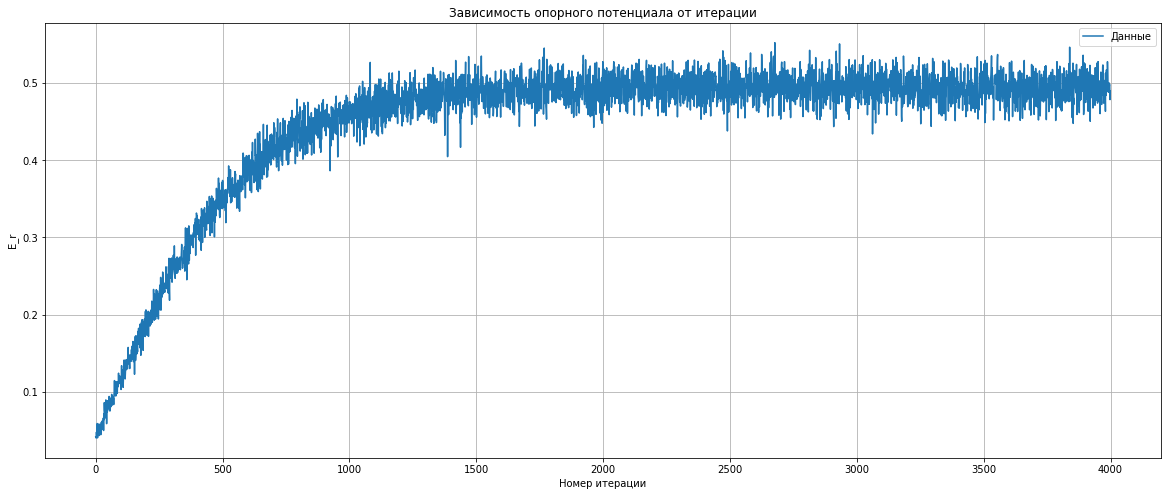

0.496631159 2.36421893174e-05
0.493893758 0.000552316819061


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x4000)_ds=0.04/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x4000)_ds=0.04/outputNE.csv')

E_ds = analyse(frame, frameNE, ds = 0.04, E_ds = E_ds, begin = 3000)
del frame
del frameNE

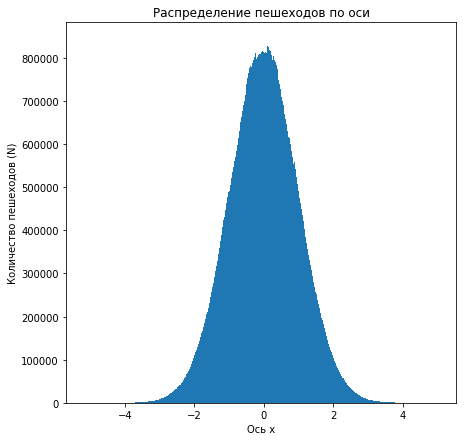

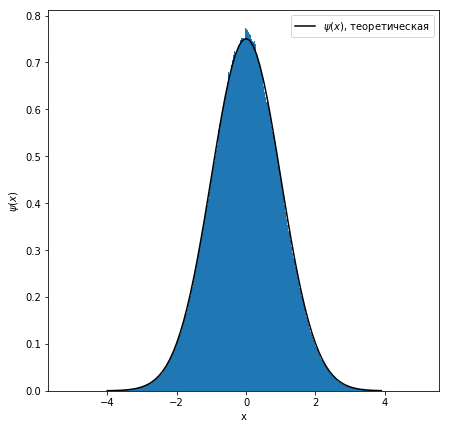

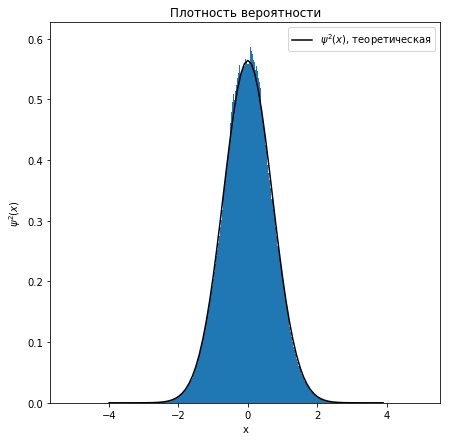

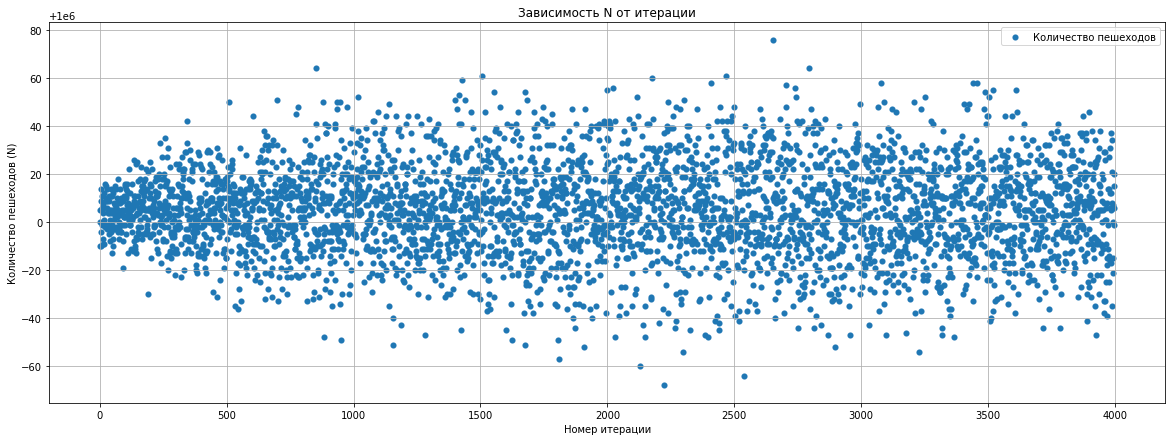

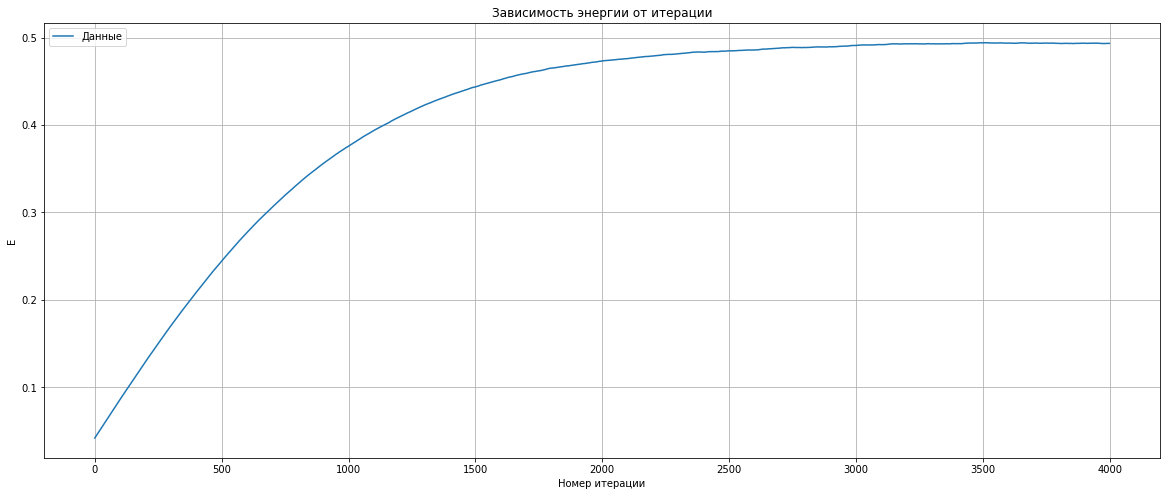

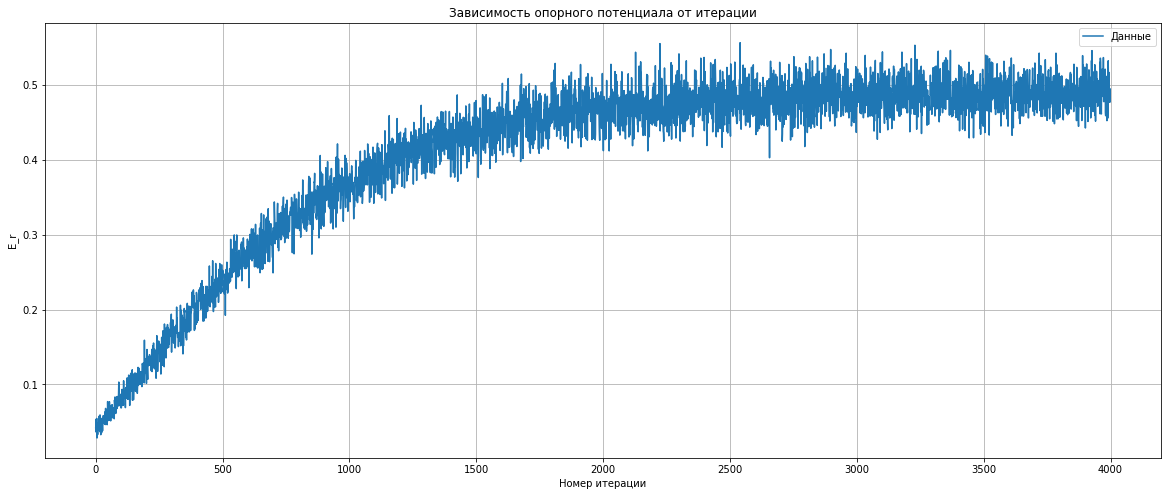

0.493640188 9.9354569755e-06
0.489054732 0.000951642280015


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x4000)_ds=0.03/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x4000)_ds=0.03/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.03, E_ds = E_ds, begin = 3500)
del frame
del frameNE

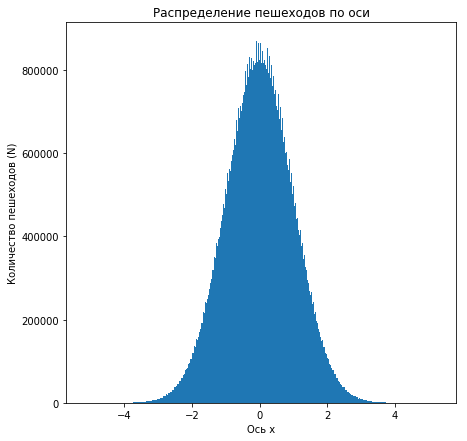

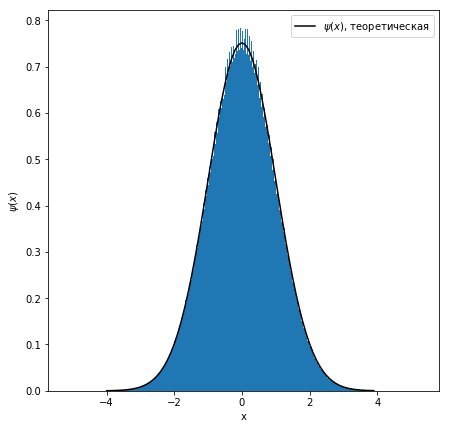

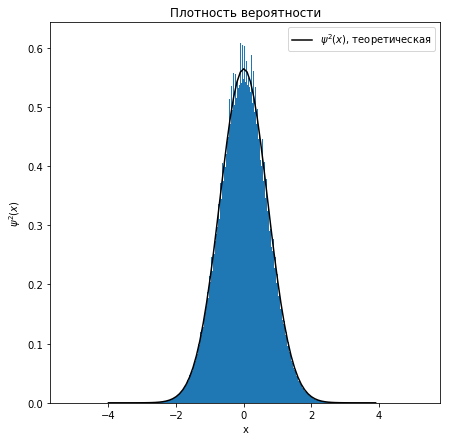

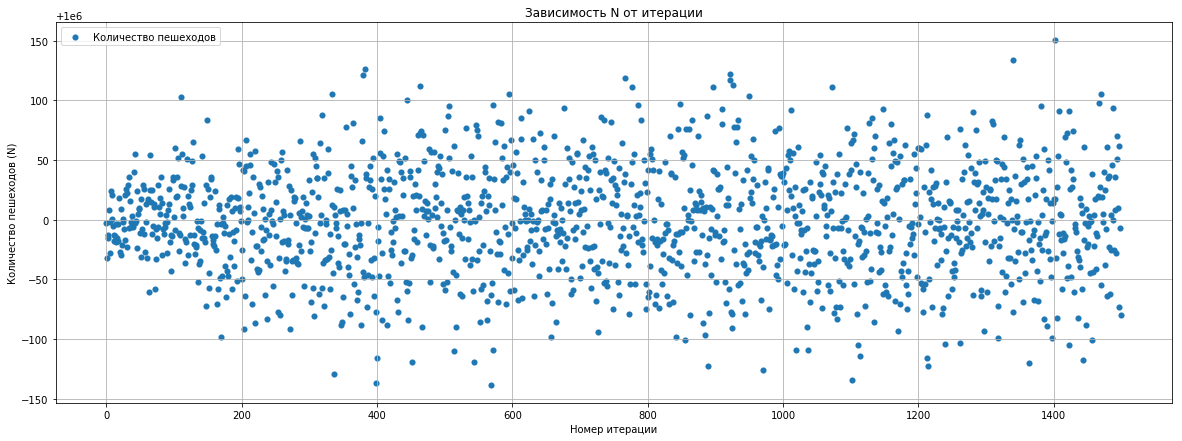

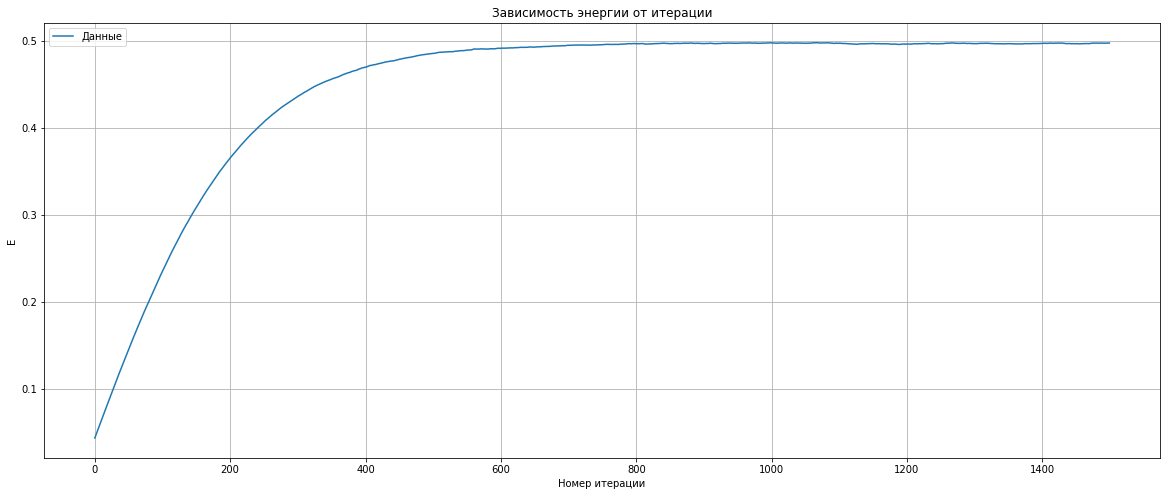

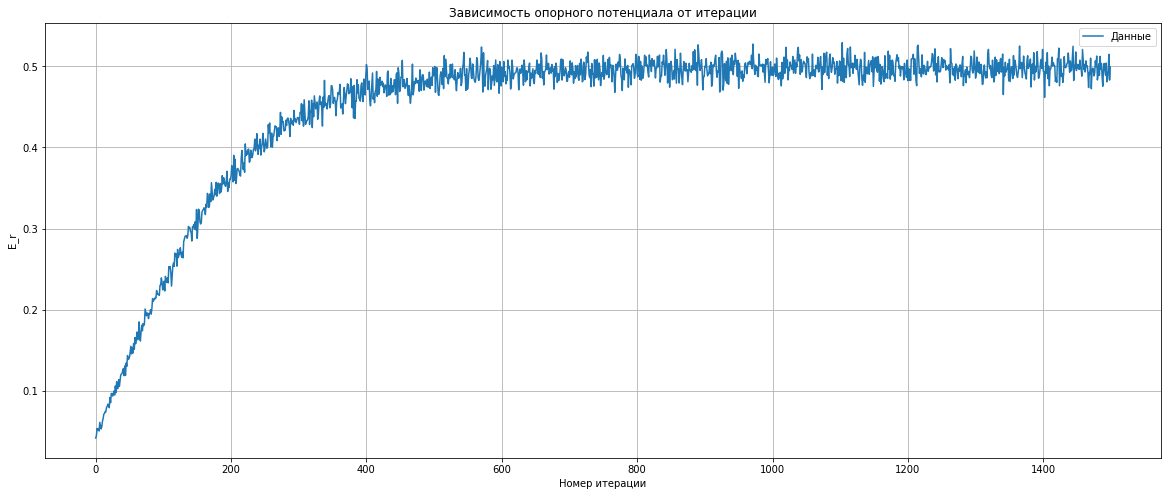

0.497278778 1.84619529149e-05
0.497968004 0.000490557220165


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1500)_ds=0.065/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1500)_ds=0.065/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.065, E_ds = E_ds, begin = 1000)
del frame
del frameNE

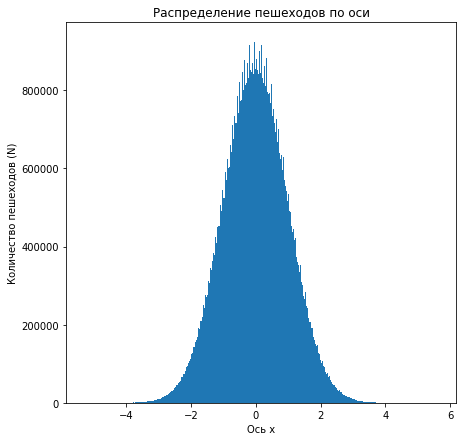

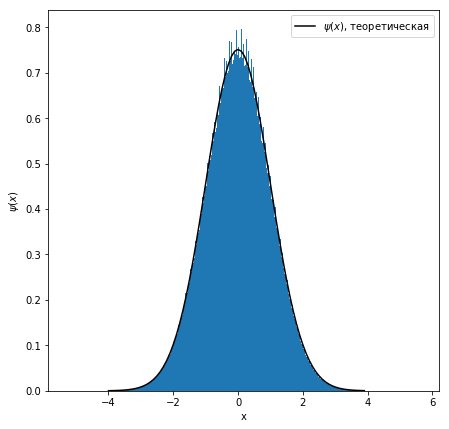

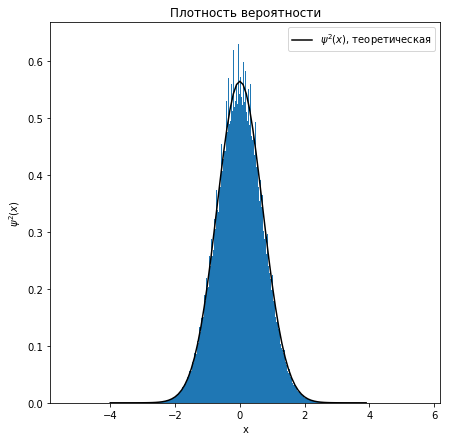

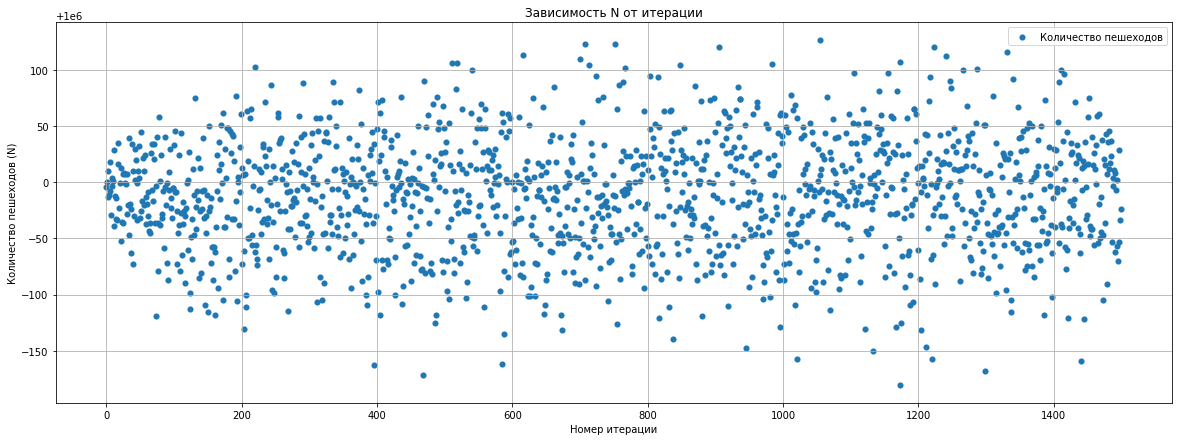

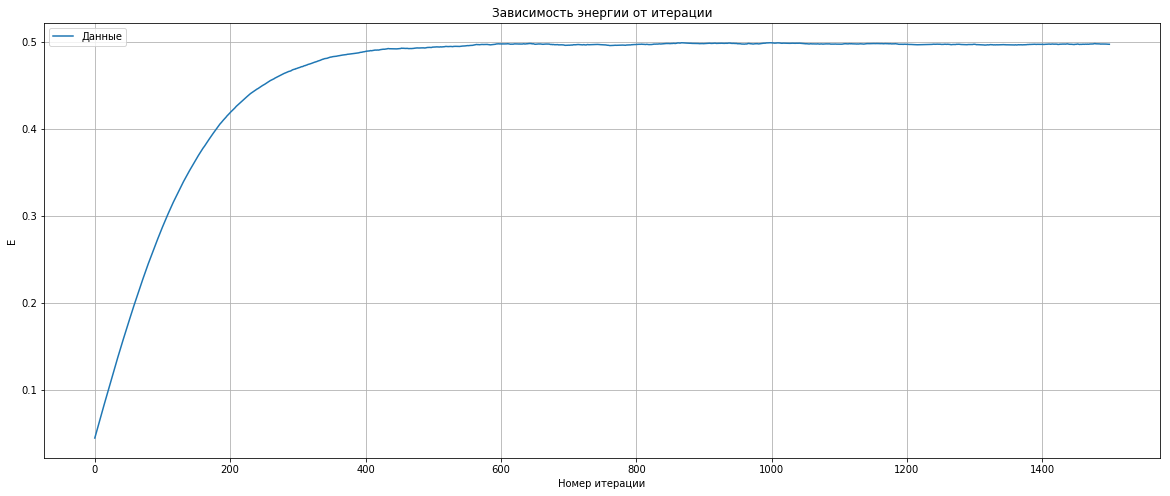

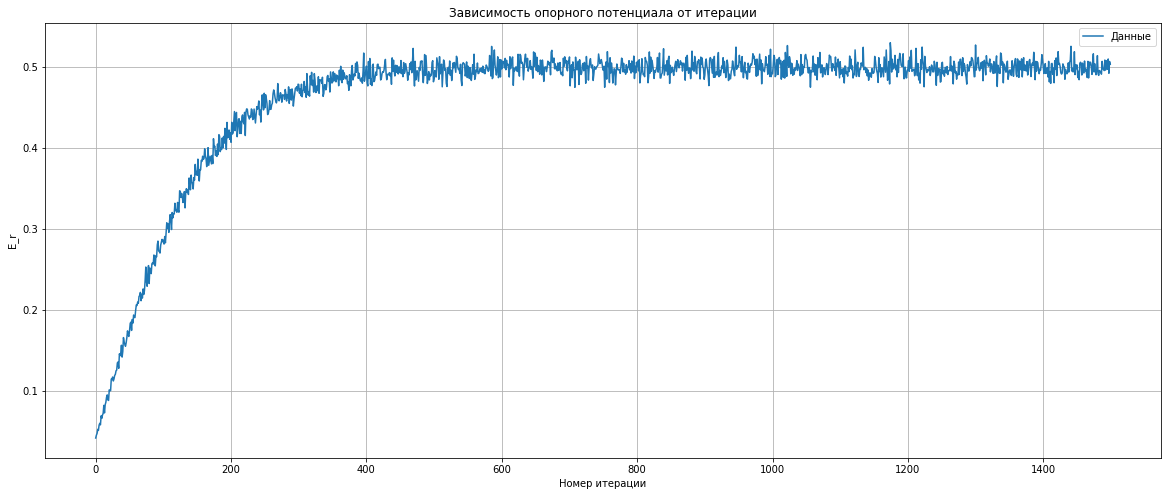

0.496998904 2.49333410029e-05
0.4986877 0.000411465900405


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1500)_ds=0.075/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1500)_ds=0.075/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.075, E_ds = E_ds, begin = 1000)
del frame
del frameNE

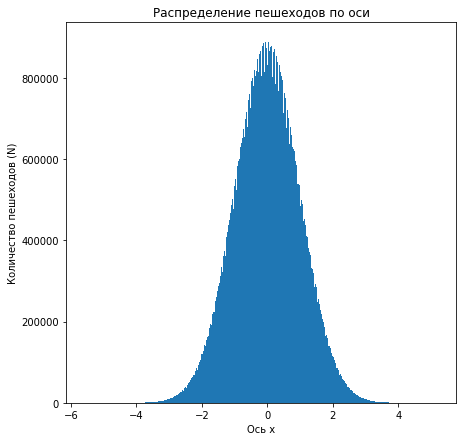

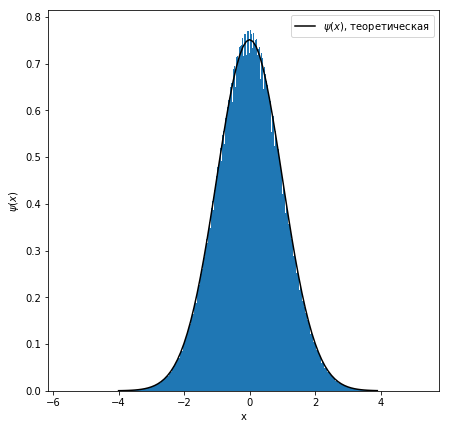

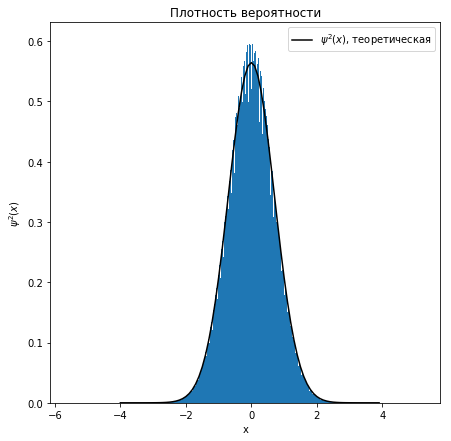

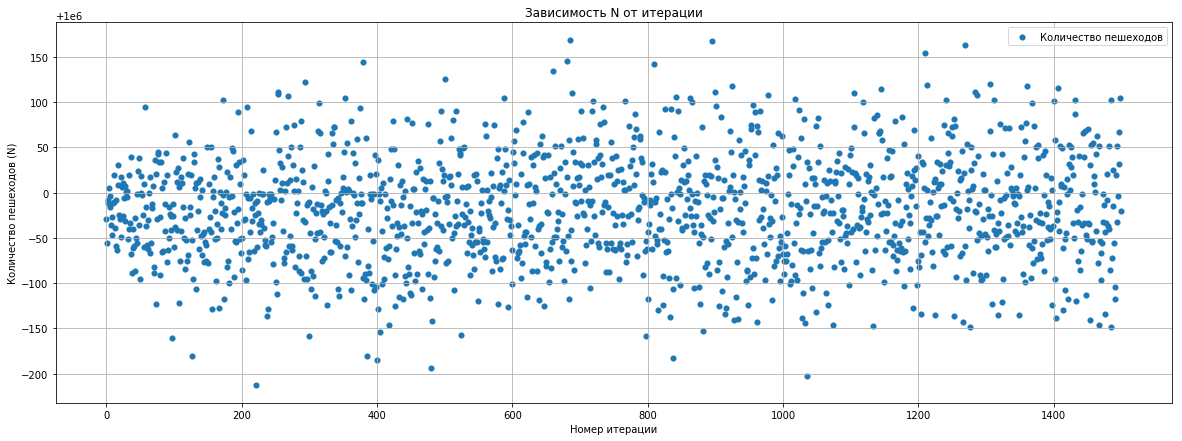

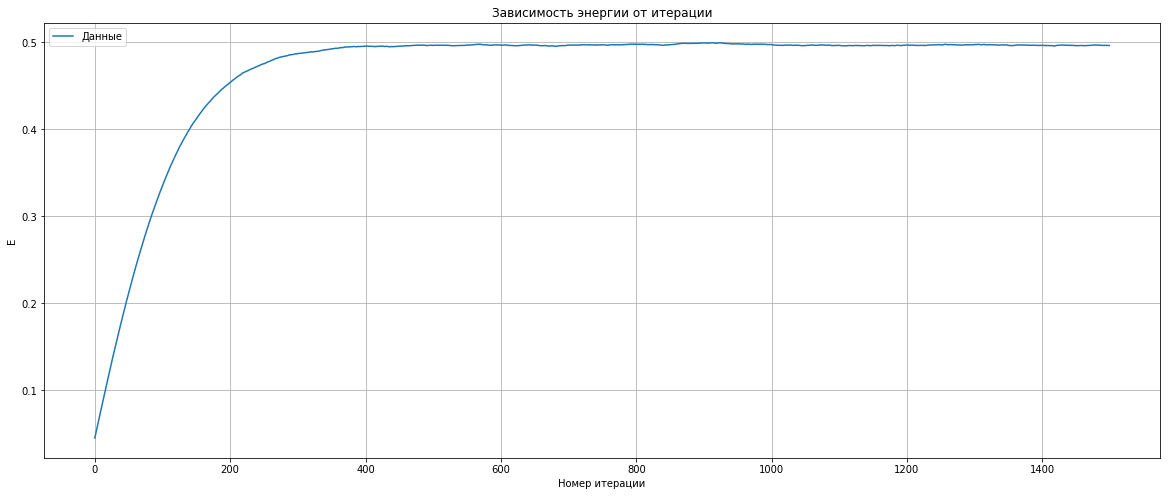

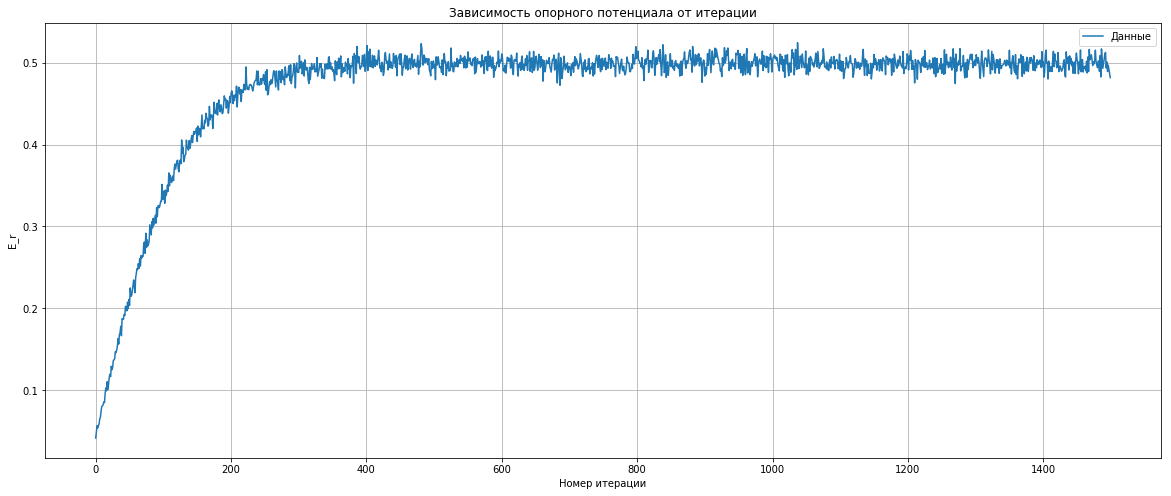

0.496556478 1.67013552454e-05
0.498796588 0.000366256550757


In [ ]:
frame = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1500)_ds=0.085/output.csv')
frameNE = pd.read_csv('D:/Backup(work)/data_output/output(1000000x1500)_ds=0.085/outputNE.csv')
E_ds = analyse(frame, frameNE, ds = 0.085, E_ds = E_ds, begin = 1000)
del frame
del frameNE

In [1]:
E_ds = E_ds.sort_values(by=['ds'])
E_ds.to_csv('E_ds.csv')
plt.plot(E_ds['ds'], E_ds['E'])
plt.grid()
plt.show()

NameError: name 'E_ds' is not defined

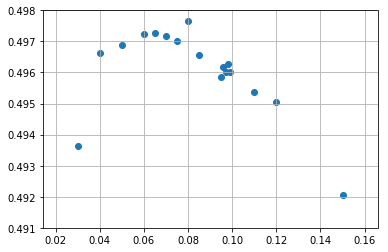

In [6]:
E_ds = pd.read_csv('E_ds.csv')
plt.scatter(E_ds['ds'], E_ds['E'])
plt.grid()
plt.ylim(0.491,0.498)
plt.show()

In [ ]:
E_ds

ds         E
13  0.030  0.493640
12  0.040  0.496631
11  0.050  0.496873
10  0.060  0.497239
14  0.065  0.497279
9   0.070  0.497182
15  0.075  0.496999
8   0.080  0.497642
16  0.085  0.496556
3   0.095  0.495844
4   0.096  0.496167
5   0.097  0.496018
6   0.098  0.496273
7   0.099  0.496013
0   0.110  0.495383
1   0.120  0.495062
2   0.150  0.492045